# Los Angeles Crime Analysis

In [1]:
# Installing the libraries that will be needed throughout the project
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install missingno
# %pip install squarify
# %pip install plotly
# %pip install plotly==5.20.0
# %pip install ipykernel
# %pip install nbformat
# %pip install jupyter

In [2]:
# Importing them
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from datetime import datetime
from scipy.stats import iqr
import squarify
import plotly.express as px
from scipy.stats import pearsonr

In [3]:
# The following will ensure that when DataFrames are printed out, all their columns are displayed as well 
pd.set_option('display.max_columns', 200)

In [4]:
# Reading the dataset for the project
crimes = pd.read_csv("C:/Users/jprin/Downloads/Crime_Data_from_2020_to_Present_20240318.csv")

In [5]:
# Displaying the first 5 rows
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,NaN,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,19,M,O,405.0,CLOTHING STORE,NaN,NaN,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,28,M,H,102.0,SIDEWALK,NaN,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [6]:
# Identifying how many rows and columns the dataset contains
crimes.shape

(910707, 28)

#### The resulting number of rows indicate the number of crimes recorded in the dataset, which gathers information for the years 2020 to 2024. In this case, 910.707 crimes were committed during these years. 

In [7]:
# Showing the column names
crimes.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
# Counting how many non null values there are for every column and its type
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910707 entries, 0 to 910706
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           910707 non-null  int64  
 1   Date Rptd       910707 non-null  object 
 2   DATE OCC        910707 non-null  object 
 3   TIME OCC        910707 non-null  int64  
 4   AREA            910707 non-null  int64  
 5   AREA NAME       910707 non-null  object 
 6   Rpt Dist No     910707 non-null  int64  
 7   Part 1-2        910707 non-null  int64  
 8   Crm Cd          910707 non-null  int64  
 9   Crm Cd Desc     910707 non-null  object 
 10  Mocodes         783696 non-null  object 
 11  Vict Age        910707 non-null  int64  
 12  Vict Sex        789672 non-null  object 
 13  Vict Descent    789663 non-null  object 
 14  Premis Cd       910697 non-null  float64
 15  Premis Desc     910153 non-null  object 
 16  Weapon Used Cd  315247 non-null  float64
 17  Weapon Des

In [9]:
# Acquiring relevant information about the features of the dataset
crimes.describe(include=["O"])

,Date Rptd,DATE OCC,AREA NAME,Crm Cd Desc,Mocodes,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status,Status Desc,LOCATION,Cross Street
count,910707,910707,910707,910707,783696,789672,789663,910153,315247,910707,910707,910707,143332
unique,1525,1525,21,139,297895,5,20,306,79,6,6,65177,10059
top,02/03/2023 12:00:00 AM,01/01/2020 12:00:00 AM,Central,VEHICLE - STOLEN,0344,M,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,800 N ALAMEDA ST,BROADWAY
freq,925,1133,62071,97716,36947,373417,277284,230836,168842,728546,728546,1728,2362


In [10]:
# Displaying the count for unique values in categorical columns
cat_cols = crimes.select_dtypes(include=['object']).columns
for col in cat_cols:
    unique_count = crimes[col].value_counts()
    print(f"\nUnique values count for '{col}': ")
    print(unique_count)


Unique values count for 'Date Rptd': 
Date Rptd
02/03/2023 12:00:00 AM    925
02/02/2023 12:00:00 AM    921
01/03/2023 12:00:00 AM    913
05/02/2022 12:00:00 AM    909
04/04/2022 12:00:00 AM    883
                         ... 
03/04/2024 12:00:00 AM    375
04/05/2020 12:00:00 AM    363
01/01/2020 12:00:00 AM    354
03/29/2020 12:00:00 AM    353
03/22/2020 12:00:00 AM    349
Name: count, Length: 1525, dtype: int64

Unique values count for 'DATE OCC': 
DATE OCC
01/01/2020 12:00:00 AM    1133
12/02/2022 12:00:00 AM    1132
01/01/2023 12:00:00 AM    1109
02/01/2023 12:00:00 AM    1086
10/01/2022 12:00:00 AM    1072
                          ... 
03/29/2020 12:00:00 AM     421
03/22/2020 12:00:00 AM     417
04/09/2020 12:00:00 AM     415
03/03/2024 12:00:00 AM     390
03/04/2024 12:00:00 AM     133
Name: count, Length: 1525, dtype: int64

Unique values count for 'AREA NAME': 
AREA NAME
Central        62071
77th Street    56887
Pacific        53098
Southwest      51174
Hollywood      47934

### First insights:
#### - When? Seems like most of the crimes happen during the late afternoon, evening and night. 
#### Curiously, even though this dataset includes crime records between 2020 and 2024, the two dates that registered the biggest count of crimes in a day happened within a difference of only 5 days: Jan. 1 and 6/2020. The third date with the most cases also belongs to January, but in this case, for the year 2021: Jan. 1/2020. Is there any factor that is related and/or causes more crimes? Or is it pure coincidence? 
#### - What? Vehicle steal is the most common crime.
#### - Where? The Central area could be considered the most problematic area in the city, as it possesses the biggest number crimes. Equally, crimes take place by a long shot in the streets. In terms of specific locations, 800 N Alameda Street would be the most dangerous spot. In addition, the Figueroa Street corridor and Broadway are the most delicate intersections in terms of security.  
#### - How? Assaults with deadly weapons and/or aggravated assaults are undoubtlessly the most used mean to commit crimes. Nevertheless, when complementing this last variable with the description of the weapon that was used, the specificity increases: Aggravated assaults comitted through bodily forces (hits with hands, fist, feet, etc...) are then the most usual method for vehicle steal.
#### - Who? Hispanic (also by far) males represent the most frequent victims. 
#### - How long? The majority of crimes are still under investigation at the time the data was recorded.

In [11]:
# Counting empty rows per column
crimes.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           127011
Vict Age               0
Vict Sex          121035
Vict Descent      121044
Premis Cd             10
Premis Desc          554
Weapon Used Cd    595460
Weapon Desc       595460
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          844372
Crm Cd 3          908470
Crm Cd 4          910643
LOCATION               0
Cross Street      767375
LAT                    0
LON                    0
dtype: int64

In [12]:
# Checking for duplicate rows
duplicates = crimes[crimes.duplicated()]

if duplicates.empty:
    print("No duplicates found")
else:
    print("Duplicates: ")
    print(duplicates)

No duplicates found


<Axes: >

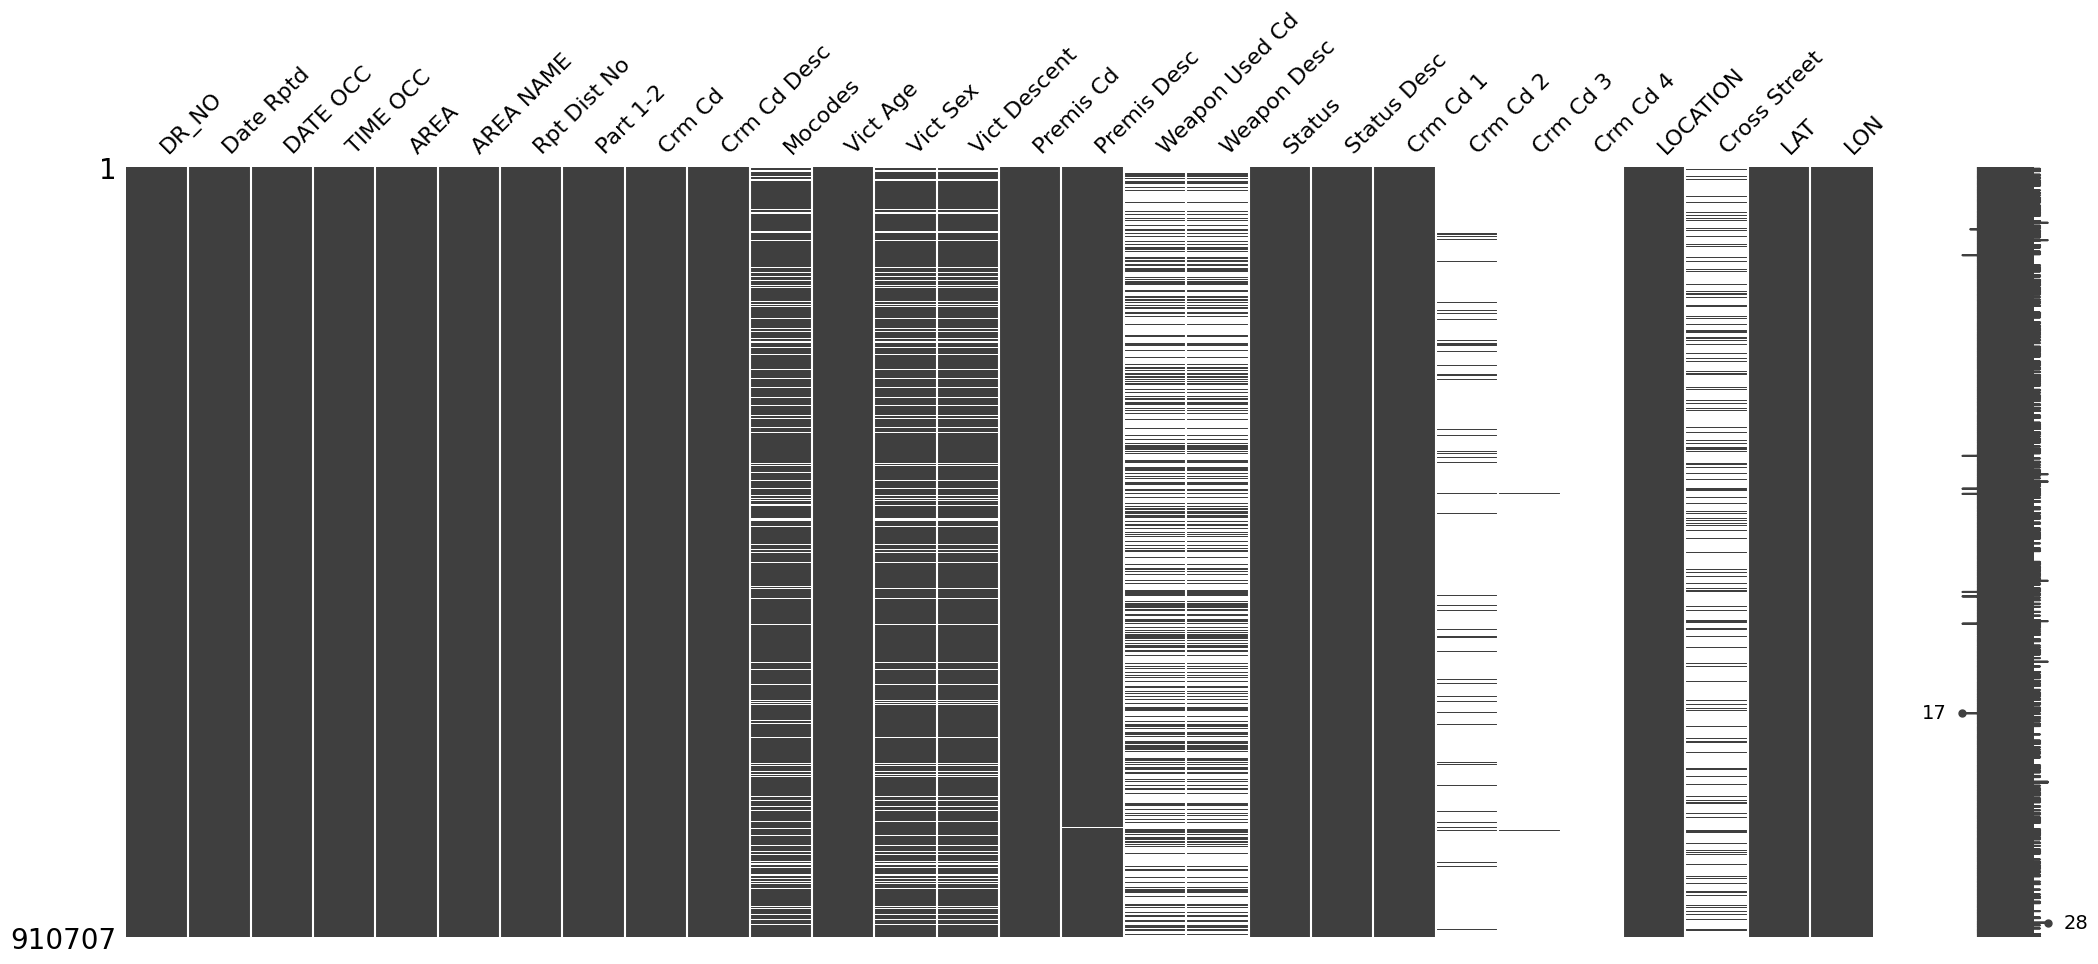

In [13]:
# Plotting the distribution of empty rows by column
msno.matrix(crimes)

### Findings from the visual:
#### 1. There seems to exist a relationship between the modus operandi of the crime, the victim sex and the victim descent.
#### 2. The code of the used weapon and its description match significantly, which perfectly makes sense taking into account that without a weapon, it is impossible to describe it. 
#### 3. Crm Cd 3 and 4 look very empty. This happens because it isn't possible to record values for Crm Cd 4 if no value was recorded for the same row in Crm Cd 3. As a result, it acts like a strainer. What this means, is that the likelihood of having multiple offenses diminishes, since not all incidents (Crm Cd 1) involve various crimes (Crm Cd 2-4). 

### Possible steps to take:
#### 1. Investigate more about the relationship between Mocodes, Vict Sex and Vict Descent.
#### 2. Map Weapon Used Cd to Weapon Desc in order to have an easier and more understandable way to work with these columns.
#### 3. Drop Crm Cd 3 and 4. Although Crm Cd 2 contains some values, we could compare its number of missing values with the 5% threshold and then decide whether it should be dropped or not.

In [14]:
# Calculating the 5% threshold: If missing values in a column represent 5% or more of all values, the column can be considered for dropping from the dataset.
threshold = len(crimes) * 0.05
threshold

45535.350000000006

In [15]:
# Calculating the number of empty rows for Crm Cd 2
print(crimes['Crm Cd 2'].isna().sum())

844372


#### As the vast majority of rows in Crm Cd 2 were empty, this column will be dropped alongside with Crm Cd 3 and 4. However, before getting to that, it is appropiate to check if further additional crimes (Crm Cd 2) show any pattern in relationship with other variables.

#### Prior to that, the time fraction of 'DATE OCC' will be eliminated, as 'TIME OCC' already specifies that in the 24-hour format. Then, 'TIME OCC' will be modified by extracting only the two first figures, i.e. the hours, which will be subsequently assigned to a new column: 'hour_occ'

In [16]:
# Knowing the format types for 'Date Rptd', 'DATE OCC' and 'TIME OCC'
print(crimes[['Date Rptd', 'DATE OCC', 'TIME OCC']].dtypes) 

Date Rptd    object
DATE OCC     object
TIME OCC      int64
dtype: object


In [17]:
# Removing the time fraction in 'DATE OCC'
crimes['DATE OCC'] = crimes['DATE OCC'].str.split().str[0]

# As 'Date Rptd' and 'DATE OCC' are objects, they will be converted to datetime objects
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p')
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'], format='%m/%d/%Y')

# Extracting only the date components of the columns. The time fraction will be ignored
crimes['Date Rptd'] = crimes['Date Rptd'].dt.date
crimes['DATE OCC'] = crimes['DATE OCC'].dt.date

crimes[['DATE OCC', 'TIME OCC', 'Date Rptd']]

,DATE OCC,TIME OCC,Date Rptd
0,2020-03-01,2130,2020-03-01
1,2020-02-08,1800,2020-02-09
2,2020-11-04,1700,2020-11-11
3,2020-03-10,2037,2023-05-10
4,2020-08-17,1200,2022-08-18
...,...,...,...
910702,2024-02-17,2330,2024-02-20
910703,2024-01-08,800,2024-01-08
910704,2024-01-16,1510,2024-01-16
910705,2024-01-31,30,2024-02-02


In [18]:
# Checking for the type
print(crimes[['DATE OCC', 'Date Rptd']].dtypes)

DATE OCC     object
Date Rptd    object
dtype: object


In [19]:
# Convert 'DATE OCC' and 'Date Rptd' to date format
crimes['DATE OCC'] = pd.to_datetime(crimes['DATE OCC'])
crimes['Date Rptd'] = pd.to_datetime(crimes['Date Rptd'])

# Create the 'day_differ' column as the difference in days between 'Date Rptd' and 'DATE OCC'
crimes['day_differ'] = (crimes['Date Rptd'] - crimes['DATE OCC']).dt.days
crimes['day_differ']

0            0
1            1
2            7
3         1156
4          731
          ... 
910702       3
910703       0
910704       0
910705       2
910706       0
Name: day_differ, Length: 910707, dtype: int64

In [20]:
# Adding 0's to values with a length shorter than 4 figures
crimes['TIME OCC'] = crimes['TIME OCC'].astype(str).str.zfill(4)

# Extracting the hour and creating the 'hour_occ' column
crimes['hour_occ'] = pd.to_datetime(crimes['TIME OCC'], format='%H%M').dt.hour
crimes['hour_occ']

0         21
1         18
2         17
3         20
4         12
          ..
910702    23
910703     8
910704    15
910705     0
910706     1
Name: hour_occ, Length: 910707, dtype: int32

#### Now, before eliminating Crm Cd 2, the column will be quickly analyzed to make sure information of interest will not be ignored.   

In [21]:
# Filtering the original dataset for non NaN rows in the Crm Cd 2 column
crm_cd_2_sub = crimes[crimes['Crm Cd 2'].notna()]
crm_cd_2_sub.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,day_differ,hour_occ
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,0,M,O,101.0,STREET,NaN,NaN,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,0,21
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,NaN,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,1,18
11,221908151,2022-04-12,2020-10-01,0001,19,Mission,1988,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,0913 2024 1817 0360 1258 0507,8,F,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,821.0,NaN,NaN,13400 RANGOON ST,NaN,34.2285,-118.4258,558,0
12,230204214,2023-01-05,2020-02-01,0800,2,Rampart,201,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,1251 1258 0913 0400 0500 0522 1817,7,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,812.0,860.0,NaN,NaN,900 N MARIPOSA AV,NaN,34.0868,-118.2991,1069,8
22,231005010,2023-01-26,2020-12-01,0005,10,West Valley,1025,1,121,"RAPE, FORCIBLE",0913 1810 0400,10,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,121.0,812.0,NaN,NaN,17800 SHERMAN WY,NaN,34.2009,-118.5208,786,0


In [22]:
# Counting Crm Cd 2 crimes for Crm Cd 1 and showing the count as a percentage of the total
print(crm_cd_2_sub['Crm Cd 1'].value_counts(normalize=True))

Crm Cd 1
230.0    0.184443
310.0    0.108739
761.0    0.071558
210.0    0.070940
740.0    0.058079
           ...   
470.0    0.000015
485.0    0.000015
444.0    0.000015
880.0    0.000015
353.0    0.000015
Name: proportion, Length: 127, dtype: float64


#### Apparently, there aren't any clear connections with main crimes for their further crimes. 

#### After trying to establish any particular relationship between crm_cd_2_sub and any of its columns, the only curious factor is 'day_differ'. 

In [23]:
# Getting relevant statistics
crm_cd_2_sub['day_differ'].describe()

count    66335.000000
mean         7.650622
std         61.606311
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1505.000000
Name: day_differ, dtype: float64

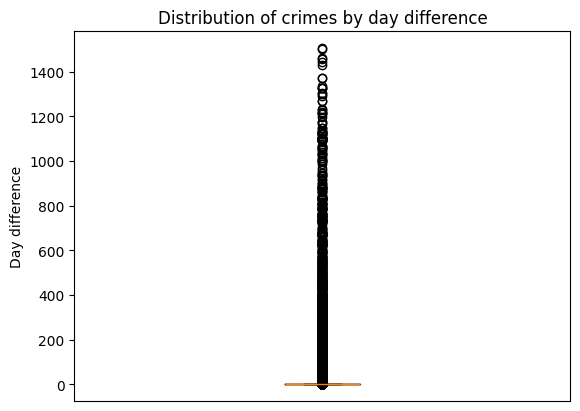

In [24]:
# Creating a boxplot
plt.boxplot(crm_cd_2_sub['day_differ'])
plt.title('Distribution of crimes by day difference')
plt.ylabel('Day difference')
plt.xticks([])

plt.show()

In [25]:
# Finding the outliers: Calculate IQR
crm_cd2_iqr = iqr(crm_cd_2_sub['day_differ'])

# Setting the lower and upper thresholds for outliers
low = np.quantile(crm_cd_2_sub['day_differ'], 0.25) - 1.5 * crm_cd2_iqr
up = np.quantile(crm_cd_2_sub['day_differ'], 0.75) + 1.5 * crm_cd2_iqr

# Extracting the rows that exceed the thresholds
crm_cd2_outliers = crm_cd_2_sub[(crm_cd_2_sub['day_differ'] < low) | (crm_cd_2_sub['day_differ'] > up)] 

# Identifying the longest day difference
max_outlier = crm_cd2_outliers[crm_cd2_outliers['day_differ'] == crm_cd2_outliers['day_differ'].max()] [['day_differ']]

print(max_outlier); print(f"Lower threshold: {low}"); print(f"Upper threshold: {up}"); print(crm_cd2_outliers)

        day_differ
199368        1505
Lower threshold: -1.5
Upper threshold: 2.5
            DR_NO  Date Rptd   DATE OCC TIME OCC  AREA    AREA NAME  \
11      221908151 2022-04-12 2020-10-01     0001    19      Mission   
12      230204214 2023-01-05 2020-02-01     0800     2      Rampart   
22      231005010 2023-01-26 2020-12-01     0005    10  West Valley   
23      231907172 2023-03-21 2020-03-15     1200    19      Mission   
24      232011098 2023-06-04 2020-07-01     1200    20      Olympic   
...           ...        ...        ...      ...   ...          ...   
908712  240600636 2024-02-10 2024-02-04     0100     6    Hollywood   
908914  241600537 2024-02-07 2024-02-02     1900    16     Foothill   
908941  240100592 2024-02-25 2024-02-22     0400     1      Central   
909317  241006098 2024-02-28 2024-02-25     1300    10  West Valley   
910325  240205583 2024-01-30 2024-01-27     1830     2      Rampart   

        Rpt Dist No  Part 1-2  Crm Cd  \
11             1988      

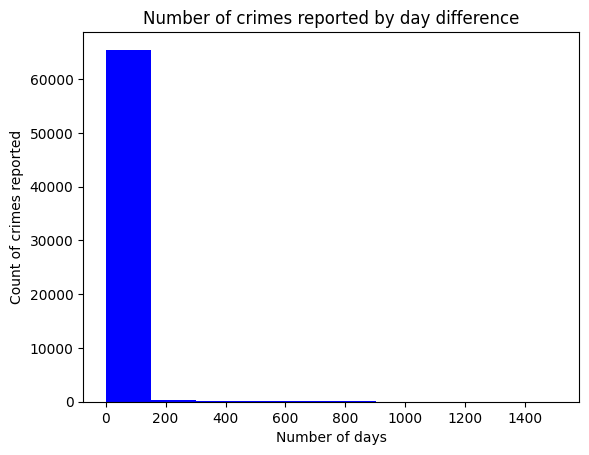

In [26]:
# Plotting the number of crimes based on the day difference
plt.hist(crm_cd_2_sub['day_differ'], color='blue')
plt.title('Number of crimes reported by day difference')
plt.xlabel('Number of days')
plt.ylabel('Count of crimes reported')
plt.show()

#### After this research, it is possible to see that the big majority of 'double crimes' are reported within less than 1 day after the crime occurs. However, due to the enormous nature of the dataset, outliers, i.e. day differences of more than 2 days, seem to represent a good deal of rows, but they actually make up roughly 9.5% of the whole dataset (crm_cd_2_sub). When plotting a histogram for this column, the graph is extremely skewed towards 0, with a long and practically invisible tail that extends until 1505. That means that there are crimes that have been reported even years after the date when they took place. This will be taken into account at the time the original dataset goes through the same procedure. 

#### Now that Crm Cd 2 was analyzed, it is time to drop some columns.

In [27]:
# Dropping unrelevant columns
crimes.drop(['AREA', 'Premis Cd', 'Weapon Used Cd', 'Status', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Mocodes', 'Crm Cd 1'], axis=1, inplace=True)


#### 'AREA' didn't represent an important column, as 'AREA NAME' refers to the same places, but with their proper names, not codes.
#### Same happens for 'Premis Cd', 'Weapon Used Cd' and 'Status': They have an equivalent column with more understandable content.
#### 'Crm Cd 2, 3, and 4' were practically empty columns.
#### It is considered that 'Cross Street' doesn't contribute with relevant insights to the analysis. Having 'LOCATION' is enough, since it specifies a place inside 'AREA NAME'.

In [28]:
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,day_differ,hour_occ
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,0,21
1,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,1,18
2,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,7,17
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,1156,20
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,731,12


### Review of the steps applied for data wrangling:
#### 1. Column types conversion: 'DATE OCC' and 'Date Rptd' values were converted to datetime objects. 'TIME OCC' was also manipulated in order to obtain its first two digits, that is, the hour.
#### 2. Feature Engineering : Through the manipulation mentioned above, 'hour_occ' was created as the resulting hours in 'TIME OCC'. 
#### 3. Working with negative values: There were values in 'Vict Age' containing numbers below 0. As a result, they were replaced with their absolute value.
#### 4. Column removal: Various columns were dropped to improve the quality of the dataset for the analysis.

#### Question 1: What are the top 10 crimes? 

In [29]:
# Counting the number of unique values, i.e. crimes
crimes['Crm Cd Desc'].nunique()

139

C:\Users\jprin\AppData\Local\Temp\ipykernel_8240\787064429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes, y=top_crimes.index, palette='viridis')


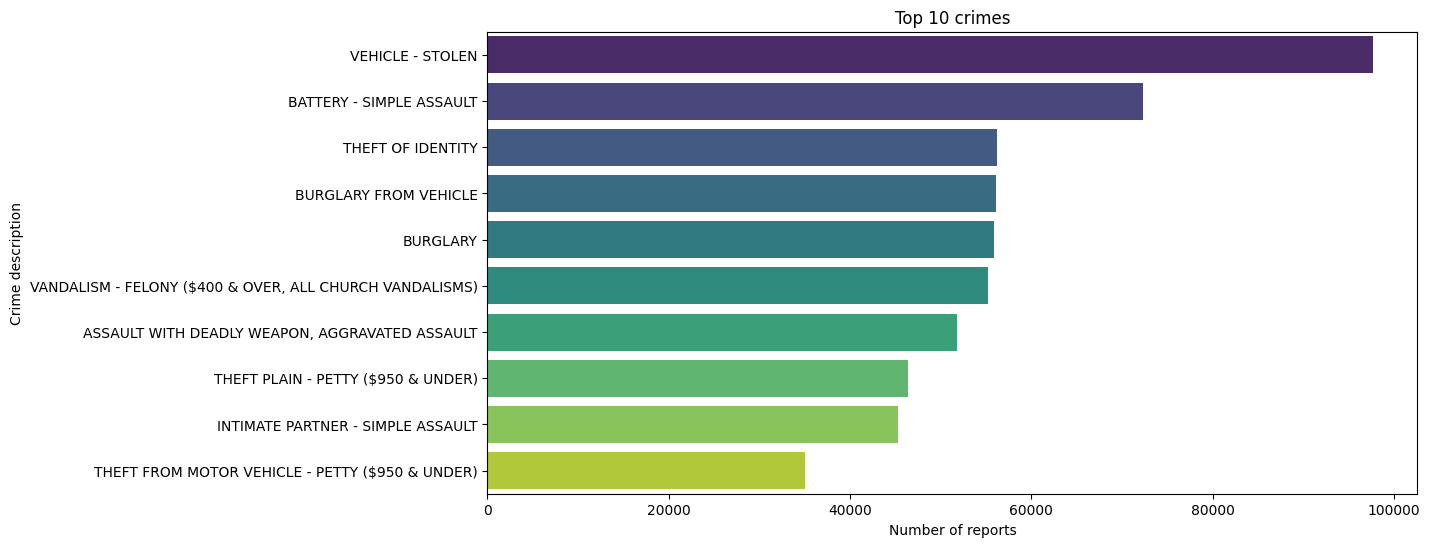

In [30]:
# Counting the 10 most common crimes
top_crimes = crimes['Crm Cd Desc'].value_counts().nlargest(10)

# Plotting a bar chart of this top
plt.figure(figsize=(12,6))
sns.barplot(x=top_crimes, y=top_crimes.index, palette='viridis')
plt.title('Top 10 crimes')
plt.xlabel('Number of reports')
plt.ylabel('Crime description')
plt.show()

#### The bar plot above reivindicates what the initial description of the dataset showed and was then mentioned when the first findings were made: As of March 2024, stolen vehicles have been the most common crime in Los Angeles since 2020, reporting around 100.000 cases. 
#### Based on the type of crimes that are presented, it can be inferred that this city has a prevalence of property theft and damage. This context implies that economic disparities and distress are significante concerns. The high number of vandalism cases suggests social tensions and intimate partner violence points to domestic issues.

In [31]:
# Finding all the crimes that the dataset contains 
crimes['Crm Cd Desc'].unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',

#### In order to provide a meaningful analysis, the crime descriptions will be grouped into different, bigger categories that encompass them and reduce the total number.

In [32]:
# Creating the different categories and adding the respective crimes to them
crime_categories = ['Burglary & Theft', 'Shoplifting', 'Robbery', 'Fraudulent activities', 'Assault & Battery', 'Vandalism', 'Sexual offenses', 'Crimes against children', 'Public order & Safety', 'Violations of orders or laws']

# Specifying the words that the crimes for every category may contain 
burglary_theft = 'STOLEN|BURGLARY|THEFT|PICKPOCKET|ARSON|PURSE'
shoplifting = 'SHOPLIFTING'
robbery = 'ROBBERY|EXTORTION'
fraud_activities = 'FRAUD|COUNTERFEIT|DOCUMENT|FALSE|BIGAMY|BRIBERY|CONSPIRACY|TELEPHONE|PHONE'
assault_battery = 'BATTERY|ASSAULT'
vandalism = 'VANDALISM|THROWING|DAMAGE'
sexual_offenses = 'SEXUAL|SEX|RAPE|COPULATION|LEWD'
crimes_children = 'CHILD|KIDNAPPING|CHLD'
public_order_safety = 'THREATS|PROWLER|TRESPASSING|PEACE|DISPERSE|RIOT|BLOCKING|RESISTING|BOMBING|LYINCHINGS|DISTURB|SHOTS|WRECKING|EPO'
violations_orders_laws = 'VIOLATION'

# Applying the words for the search within 'Crm Cd Desc' 
conditions = [
    (crimes['Crm Cd Desc'].str.contains(burglary_theft)),
    (crimes['Crm Cd Desc'].str.contains(shoplifting)),
    (crimes['Crm Cd Desc'].str.contains(robbery)),
    (crimes['Crm Cd Desc'].str.contains(fraud_activities)),
    (crimes['Crm Cd Desc'].str.contains(assault_battery)),
    (crimes['Crm Cd Desc'].str.contains(vandalism)),
    (crimes['Crm Cd Desc'].str.contains(sexual_offenses)),
    (crimes['Crm Cd Desc'].str.contains(crimes_children)),
    (crimes['Crm Cd Desc'].str.contains(public_order_safety)),
    (crimes['Crm Cd Desc'].str.contains(violations_orders_laws))
]

# Creating the 'crime_category' column, which stores the respective category for every crime
crimes['crime_category'] = np.select(conditions, crime_categories, default='Other')

crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,day_differ,hour_occ,crime_category
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,0,21,Burglary & Theft
1,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,1,18,Burglary & Theft
2,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,7,17,Burglary & Theft
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,1156,20,Burglary & Theft
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,731,12,Burglary & Theft


C:\Users\jprin\AppData\Local\Temp\ipykernel_8240\3345205552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='crime_category', data=crimes, palette='viridis', order=order)


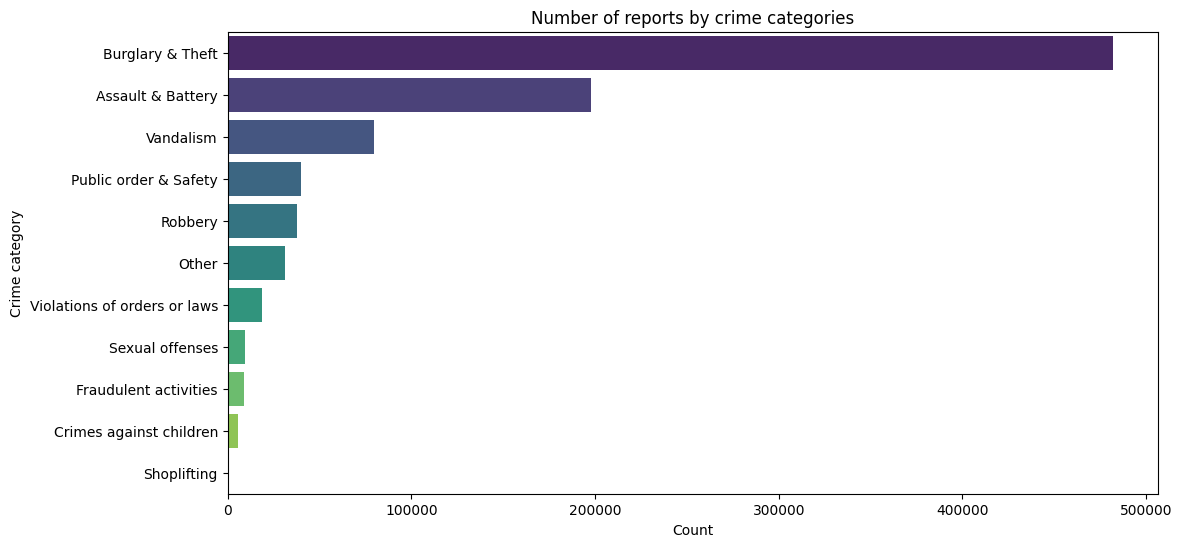

In [33]:
# Counting values for every crime category
order = crimes['crime_category'].value_counts().index

# Creating a countplot with crime categories
plt.figure(figsize=(12,6))
sns.countplot(y='crime_category', data=crimes, palette='viridis', order=order)
plt.title('Number of reports by crime categories')
plt.ylabel('Crime category')
plt.xlabel('Count')
plt.show()

In [34]:
# Counting the number of cases for every crime category
crimes.groupby('crime_category').size().sort_values(ascending=False)

crime_category
Burglary & Theft                482130
Assault & Battery               197577
Vandalism                        79626
Public order & Safety            39952
Robbery                          37758
Other                            31046
Violations of orders or laws     18478
Sexual offenses                   9529
Fraudulent activities             9018
Crimes against children           5487
Shoplifting                        106
dtype: int64

In [35]:
# Finding the most common crimes in 'Other'
other = crimes.query("`crime_category`=='Other'")
other.groupby('Crm Cd Desc').size().nlargest(5)

Crm Cd Desc
BRANDISH WEAPON              14098
OTHER MISCELLANEOUS CRIME     6577
CONTEMPT OF COURT             2638
CRIMINAL HOMICIDE             1524
FAILURE TO YIELD              1479
dtype: int64

In [36]:
# Finding the most common crimes in 'Public order & Safety'
public_order = crimes.query("`crime_category`=='Public order & Safety'")
public_order.groupby('Crm Cd Desc').size().nlargest(5)

Crm Cd Desc
CRIMINAL THREATS - NO WEAPON DISPLAYED    18668
TRESPASSING                               13901
DISCHARGE FIREARMS/SHOTS FIRED             2639
SHOTS FIRED AT INHABITED DWELLING          1597
DISTURBING THE PEACE                       1464
dtype: int64

#### The second plot coincides with the first observations, being burglaries, thefts, batteries and assaults the most common crimes in Los Angeles. Vandalism and public safety problems also represent an important share of the crimes. Aditionally, when zooming in 'Other', weapon brandishing constitutes almost the half of the cases for this category. It is possible to conclude that Los Angeles is going through economic and social imbalances that are unleashing an important wave of delinquency.

### Question 2: How do crime victims vary across age groups?

#### First, an overview of the age distribution would be useful, so a histogram should be the appropiate graph.
#### Before plotting Vict Age, age bins must be created. Therefore, Sturges' formula will be used to calculate them equally.

In [37]:
# Using Sturges' formula to calculate bins
age_bins = math.log2(len(crimes["Vict Age"]))
age_bins

19.796627447631572

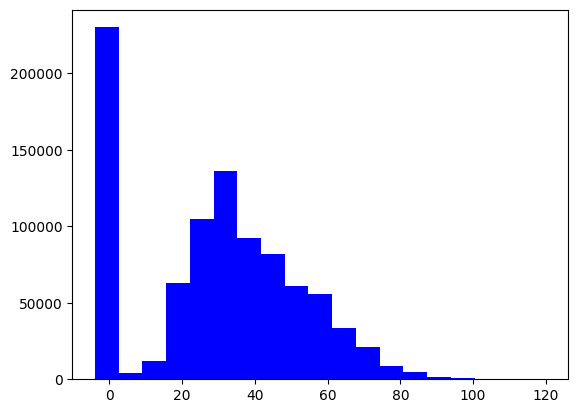

In [38]:
# Plotting the distribution of Vict Age
plt.hist(crimes["Vict Age"], bins=19, color="blue")
plt.show()

#### Surprisingly, the plot shows that more than 100.000 crimes involved victims that were within the age group 0. In fact, that is the age group that contains the most cases.
#### An aspect that should be brought to mention, is that the dataset also contains crimes in which the victim's age may be irrelevant (like in the first row: stolen vehicle), so the police record does not specify an age. Thus, the best option is to leave it as it is, also given the fact that more than 200.000 rows, an important part of the total, would not be considered.
#### In addition, the histogram shows a huge increase of cases for victims entering their 20s, and the number of reports experiences an upward tendency until the amount of victims beginning their 40s. From this point on, cases decrease. Alongside with the number reached by the age group 0, victims after 36 and until 40 report more than 100.000 cases.

#### Now, a column for age categories will be created. The histogram shows values under 0, therefore, it will be considered that they are product of inconsistencies during the data entry process. As a result, they will be transformed into positive values.  

In [39]:
# Proof of negative values 
min_age = crimes["Vict Age"].min()
min_age

-4

In [40]:
# Transforming them into positive numbers and ensuring that the minimum age is 0
crimes['Vict Age'] = crimes['Vict Age'].abs()
crimes['Vict Age'].min()

0

In [41]:
# Creating the age_category column
vict_age_bins = [-1, 12, 19, 29, 39, 49, 59, 69, 79, 89, 99]
vict_age_labels = ['0-12', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']
crimes['age_category'] = pd.cut(crimes['Vict Age'], labels=vict_age_labels, bins=vict_age_bins)
print(crimes[['Vict Age', 'age_category']])

        Vict Age age_category
0              0         0-12
1             47        40-49
2             19        13-19
3             19        13-19
4             28        20-29
...          ...          ...
910702        44        40-49
910703        42        40-49
910704        80        80-89
910705         0         0-12
910706         0         0-12

[910707 rows x 2 columns]


C:\Users\jprin\AppData\Local\Temp\ipykernel_8240\2357902253.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x='age_category', data=crimes, order=category_order, palette='viridis')


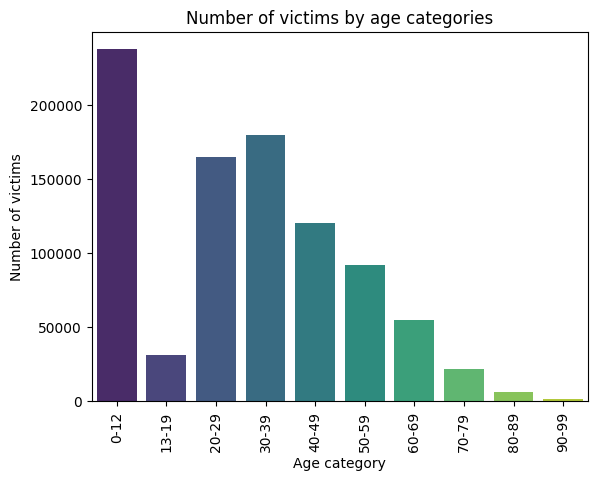

In [42]:
# Designing a countplot for the age categories and number of cases
# Specifying the order of the values on the x-axis 
category_order = ['0-12', '13-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Plotting
g = sns.countplot(x='age_category', data=crimes, order=category_order, palette='viridis')
g.set_title('Number of victims by age categories')
g.set(xlabel='Age category', ylabel='Number of victims')
plt.xticks(rotation=90)
plt.show()

In [43]:
# Finding out how many values in the age category 0-12 are equal to 0 
crimes.query('`Vict Age` == 0').shape[0]

229674

In [44]:
# Counting the cases for each category
crimes['age_category'].value_counts(sort=True)

age_category
0-12     237603
30-39    179860
20-29    164776
40-49    120711
50-59     91787
60-69     55308
13-19     31269
70-79     21642
80-89      6220
90-99      1530
Name: count, dtype: int64

#### After establishing the categories, the general aspects that the histogram covered are also valid here: 
#### 1. The 0-12 years old category continues exceeding the 100.000 cases. When counting the number of rows for victims with an age of 0, the result shows that this value in specific makes up the 93% of the total rows in its category.
#### 2. Again, there's this enormous increment of more than 125.000 cases when passing from the 13-19 category to the 20s.
#### 3. The 30-39 category registers the most crimes, being very close to the 180.000 cases.
#### 4. After that age group, there's a clear downward trend for the rest of categories. 
#### 5. Kids, adolescents and elders are the least affected age groups, however, only people between 80 and 99 represent less than 10.000 cases. 

### Question 3: How does the number of reported crimes vary over different time periods (e.g., months, years)? Are there any noticeable seasonal patterns or trends in crime occurrence? How much time on average separates the date of occurrence and the date of report?

In [45]:
# Creating a column for the month during which a crime occured 
crimes['month_occ'] = crimes['DATE OCC'].dt.month

# Same objective, but this time for year
crimes['year_occ'] = crimes['DATE OCC'].dt.year

In [46]:
# Plotting crimes by year, month and overall
# 1. Plotting crimes by year
# Counting crimes per year 
year_crimes = crimes.groupby('year_occ').size().reset_index(name='crimes_count_year')

# Filtering for the years before 2024 in order to calculate the mean
year_crimes_avg = year_crimes[year_crimes['year_occ'] < 2024]

# Finding the mean
year_crimes_avg = year_crimes_avg['crimes_count_year'].mean()

print(year_crimes); print(f"The average number of crimes per year is: {year_crimes_avg} crimes")


   year_occ  crimes_count_year
0      2020             199617
1      2021             209596
2      2022             234784
3      2023             230610
4      2024              36100
The average number of crimes per year is: 218651.75 crimes


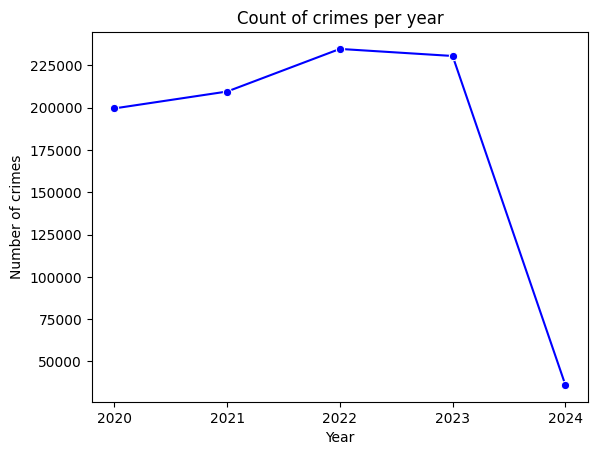

In [47]:
# Plotting 'year_crimes'
sns.lineplot(data=year_crimes, x='year_occ', y='crimes_count_year', marker='o', color='blue')
plt.title('Count of crimes per year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')
plt.xticks(year_crimes['year_occ'])
plt.show()

#### In general, crimes increased between 2020 and 2022, where they reached their peak with 234.784 cases. Delinquency in 2023 went down by around 4.000 cases in comparison with 2022, however, the count for this year was still higher than 2020 and 2021. As a reminder, by the time this project is being conducted, the data was updated in March 2024 last time, therefore, the count for 2024 is so low. Moreover, as a matter of fact, the average number of crimes from 2020 to 2023 was of 218.652 cases.  

In [48]:
# 2. Plotting crimes by month
# Counting crimes per month
month_crimes = crimes.groupby('month_occ').size().reset_index(name='crimes_count_month')

# Setting the order of the months
month_crimes['month_occ'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_crimes

,month_occ,crimes_count_month
0,Jan,91861
1,Feb,84995
2,Mar,72879
3,Apr,70405
4,May,73476
5,Jun,73067
6,Jul,75618
7,Aug,75313
8,Sep,72466
9,Oct,76024


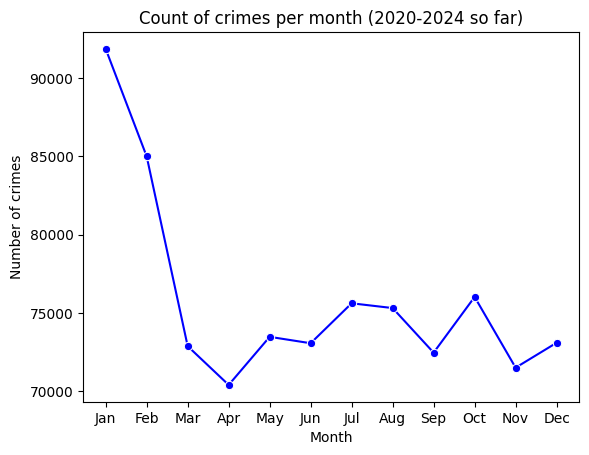

In [49]:
# 2.1. Plotting 'month_crimes'
sns.lineplot(data=month_crimes, x='month_occ', y='crimes_count_month', marker='o', color='blue')
plt.title('Count of crimes per month (2020-2024 so far)')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.xticks(month_crimes['month_occ'])
plt.show()

#### As it was briefly mentioned after the first findings, this graphs reinforces that January is with a fair difference the month with the most cases (91.861). February is also a month with quite a lot of crimes (84.995). This is due to the fact that the current dataset gathers crimes records until March 2024. As a consequence, January and February are the only months with data for 2024, that is, one extra row for each of them in the count and therefore, much more cases than the rest of the months. 

#### Now the dataset will be filtered for crimes before 2024 and then the same graph will be plotted.

In [50]:
# Including years between 2020 and 2023
crimes_2023 = crimes.query("`year_occ` < 2024")

# Counting the occurrences for the months, not including 2024, as it only has records for Jan., Feb. and Mar.
month_crimes2 = crimes_2023.groupby('month_occ').size().reset_index(name='crimes_count_month')

# Ordering the months column
month_crimes2['month_occ'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

month_crimes2


,month_occ,crimes_count_month
0,Jan,73471
1,Feb,68848
2,Mar,71316
3,Apr,70405
4,May,73476
5,Jun,73067
6,Jul,75618
7,Aug,75313
8,Sep,72466
9,Oct,76024


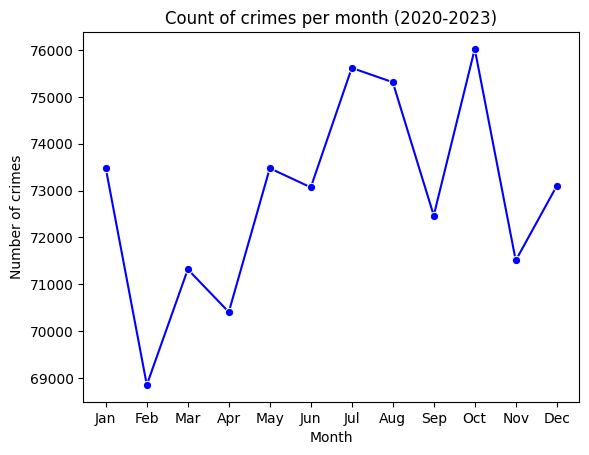

In [51]:
# 2.2. Plotting 'month_crimes2'
sns.lineplot(data=month_crimes2, x='month_occ', y='crimes_count_month', marker='o', color='blue')
plt.title('Count of crimes per month (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Number of crimes')
plt.xticks(month_crimes2['month_occ'])
plt.show()

#### This plot provides a fairer background, as every month contains records from 2020 to 2023. Furthermore, the general behavior changes a lot, because now October is the month that has the most cases. In contrast, February now is the month with the least cases. It is important to take into account that the range of counts for all months falls between around 69.000 and 76.000, so the biggest difference between months is of 7.000 cases, which is a relatively small number. In the following cell, the average number of crimes per month will be determined and sorted.

In [52]:
# Calculating the count for every month in every year
monthly_counts = crimes_2023.groupby(['year_occ', 'month_occ']).size().reset_index(name='counts')

# Computing the average number of crimes per month across years 
avg_monthly_counts = monthly_counts.groupby('month_occ')['counts'].mean().reset_index(name='average_count')

# Setting the order of the months
avg_monthly_counts['month_occ'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Sorting the result by the count in descending order
avg_monthly_counts.sort_values('average_count', ascending=False)

,month_occ,average_count
9,Oct,19006.00
6,Jul,18904.50
7,Aug,18828.25
4,May,18369.00
0,Jan,18367.75
11,Dec,18274.25
5,Jun,18266.75
8,Sep,18116.50
10,Nov,17876.50
2,Mar,17829.00


#### The resulting table demonstrates that October is the leading month in average cases per year. Again, February sees less cases on average than any other month during a year, but it doesn't get away that much, as less than 2.000 cases 

#### After a little research, climate in Los Angeles is classified as subtropical/Mediterranean, which means that there's a rainy season during winter and a dry season during summer. The rainy one occurs from October or November to April, while the dry summer runs from May through October. Consequentially, the 'season' column will be added to the dataframe with the aim of understanding crime behavior throughout these two periods during every year. 

In [53]:
# Assigning a season to every month
def month_to_season(month):
    if month in [5, 6, 7, 8, 9, 10]:
        return 'Dry'
    else:
        return 'Rainy'

# Creating the 'season' column
crimes['season'] = crimes['month_occ'].apply(month_to_season)

# Counting crimes by season
year_by_season = crimes.groupby(['year_occ','season']).size().reset_index(name='count')


year_by_season

,year_occ,season,count
0,2020,Dry,100416
1,2020,Rainy,99201
2,2021,Dry,108895
3,2021,Rainy,100701
4,2022,Dry,120353
5,2022,Rainy,114431
6,2023,Dry,116300
7,2023,Rainy,114310
8,2024,Rainy,36100


In [54]:
# Creating a pivot table for the graph
season_pivot = year_by_season.pivot(index='year_occ', columns='season', values='count').fillna(0)
season_pivot

season,Dry,Rainy
year_occ,,
2020,100416.0,99201.0
2021,108895.0,100701.0
2022,120353.0,114431.0
2023,116300.0,114310.0
2024,0.0,36100.0


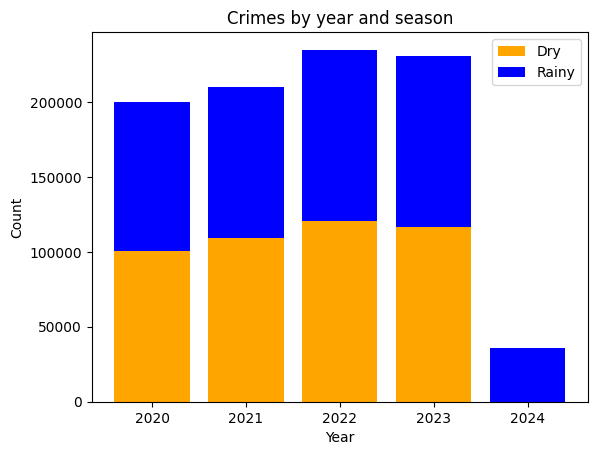

In [55]:
# 3. Plotting crimes by season
fig, ax = plt.subplots()
ind = range(len(season_pivot))
ax.bar(ind, season_pivot['Dry'], label='Dry', color='orange')
ax.bar(ind, season_pivot['Rainy'], bottom=season_pivot['Dry'], label='Rainy', color='blue')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.set_title('Crimes by year and season')
ax.set_xticks(ind)
ax.set_xticklabels(season_pivot.index)
ax.legend()
plt.show()


#### This stacked bar plot shows that there seems to exist a balance in the counts for both seasons, in other words, there's no distinction in terms of season for crimes to occur. Next, counts by hour will be plotted. The first graph will show the hours by chronological order, while the second will contain the hours sorted by number of crimes.  

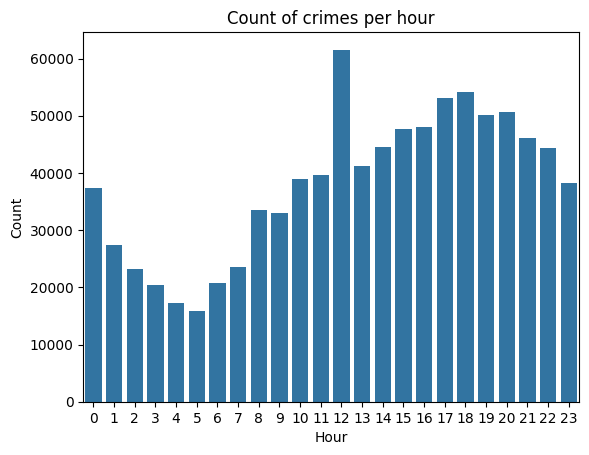

In [56]:
# 4. Plotting 'hour_occ'
sns.countplot(data=crimes, x='hour_occ')
plt.title('Count of crimes per hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

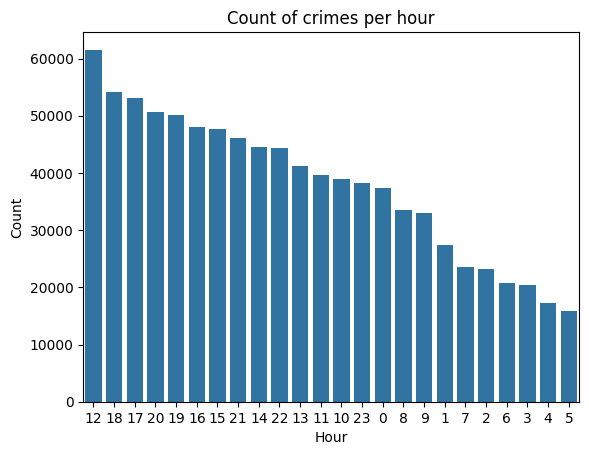

In [57]:
# 4.1. Crimes count per hour, sorted
sns.countplot(x='hour_occ', data=crimes, order=crimes['hour_occ'].value_counts().index)
plt.title('Count of crimes per hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()

#### The first plot shows a valley for hours in the early morning. Then, crimes peak at noon and 5 or 6 hours later, the second highest number appears. During evening, hours in general are linked to more occurrences. The second plot perfectly demonstrates that noon, followed by evening and late afternoon hours are the moments in the day with the most cases. On the contrary, early morning hours don't register that many crimes comparatively. 

In [121]:
# 5. Creating the 'day_occ' column, which stores the day of occurrence
crimes['date_occ'] = pd.to_datetime(crimes['DATE OCC'], dayfirst=True)
crimes['day_occ'] = crimes['date_occ'].dt.day_name()

In [124]:
# Creating a list to order the days on the x axis for the plot
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

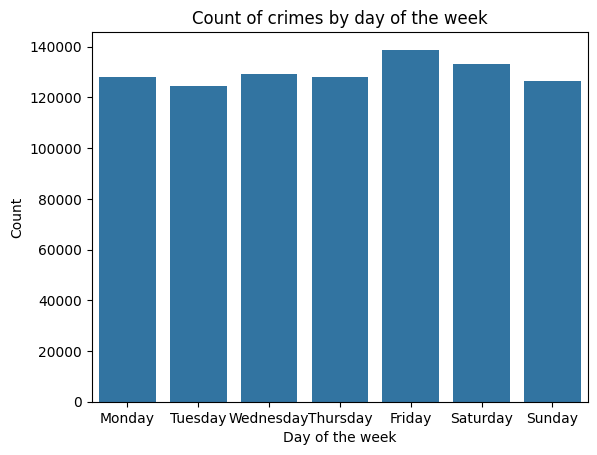

In [126]:
# Creating a bar plot of the counts per day
sns.countplot(x='day_occ', data=crimes, order=day_order)
plt.title('Count of crimes by day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.show()

#### When counting by day of the week, there isn't any significant trend as the 7 days show a relatively uniform distribution of the counts.

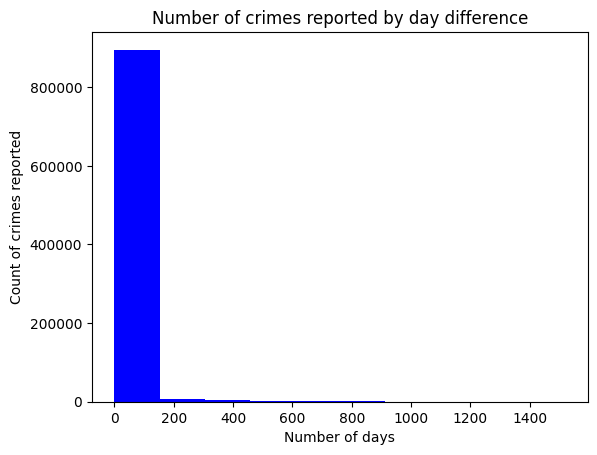

In [58]:
# 6. Plotting the distribution of 'day_differ' 
plt.hist(crimes['day_differ'], color='blue')
plt.title('Number of crimes reported by day difference')
plt.xlabel('Number of days')
plt.ylabel('Count of crimes reported')
plt.show()

In [59]:
# Counting crimes by the day difference (elapsed time in days between the day of occurrence and the day of report )
day_differ_count = crimes.groupby('day_differ').size().reset_index(name='count')

# Sorting the count in descending order
day_differ_count = day_differ_count.sort_values(by='count', ascending=False)

# Computing the average day difference
avg_diff = crimes['day_differ'].mean()

# Finding the median for the same column
diff_median = crimes['day_differ'].median()

print(f"The average difference between the date the crime occurred and the date it was reported is of {avg_diff} days"); print(f"And the median is: {diff_median}"); day_differ_count.head(10)

The average difference between the date the crime occurred and the date it was reported is of 11.124631742151976 days
And the median is: 1.0


,day_differ,count
0,0,447811
1,1,198154
2,2,56656
3,3,33092
4,4,21278
5,5,15424
6,6,11627
7,7,10386
8,8,7536
9,9,6028


In [60]:
# Finding +900 days
day_differ_count = day_differ_count[day_differ_count['day_differ'] >= 900]
day_differ_count

,day_differ,count
1071,1095,39
1072,1096,28
908,913,10
1073,1097,10
943,950,8
...,...,...
1159,1196,1
1160,1197,1
1161,1198,1
1162,1201,1


#### The previous cell explains an important indicator: The difference in days between the date in which a crime took place and the date in which it was reported is generally positive, as a very good deal of crimes are reported the same day or few days after they occurred. An interesting point in this topic is that there are cases in which crimes were reported as far as 1520 days after the date when they happened. As a result, the mean for the day difference is affected by these few extreme values. Thus, the median becomes a more convenient measure for this case, and surprisingly, it is of 1 day. That suggests that a day difference of 0 to 1 days represent half of the total values.

In [61]:
# Counting crimes by the date of occurrence
counts_date_occ = crimes['DATE OCC'].value_counts().reset_index()

# Same for the date of report
counts_date_rptd = crimes['Date Rptd'].value_counts().reset_index()

In [62]:
# Counting crimes by the date of occurrence
incidents_date_occ = crimes.groupby(['DATE OCC'])['DR_NO'].size().reset_index(name='count')

# Same for the date of report
incidents_date_rptd = crimes.groupby(['Date Rptd'])['DR_NO'].size().reset_index(name='count')

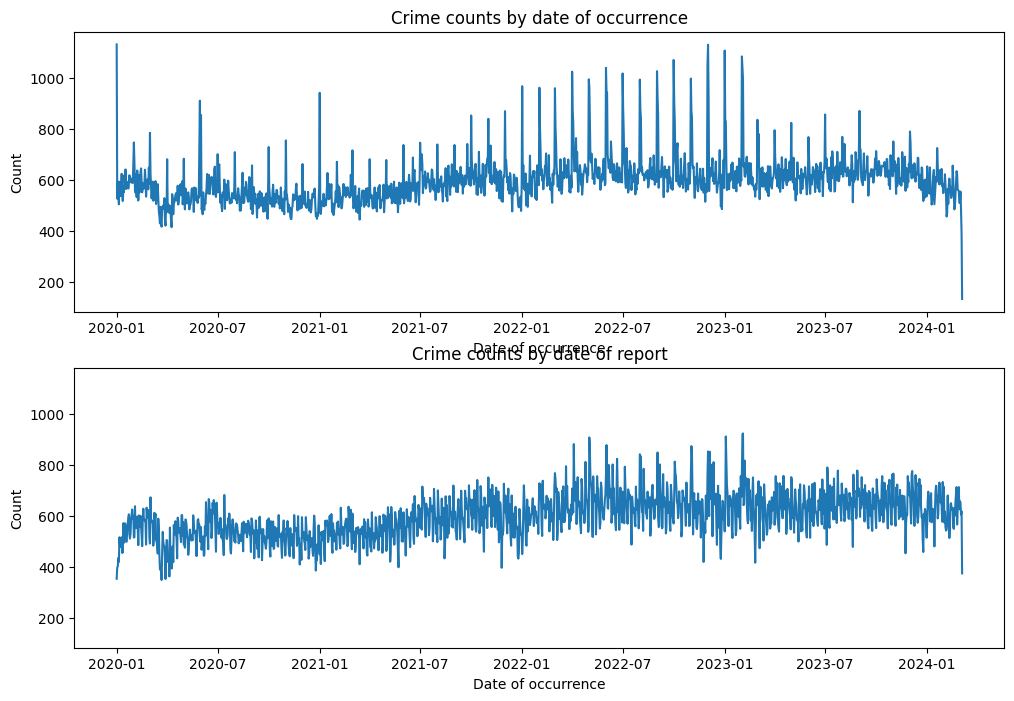

In [63]:
# Creating a double line plot
# Upper plot: Count of crimes by the date of occurrence 
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(12,8),sharey=True)
ax1.plot(incidents_date_occ['DATE OCC'], incidents_date_occ['count'])
ax1.set_title('Crime counts by date of occurrence')
ax1.set_xlabel('Date of occurrence')
ax1.set_ylabel('Count')

# Lower plot: Count of crimes by the date of report
ax2.plot(incidents_date_rptd['Date Rptd'], incidents_date_rptd['count'])
ax2.set_title('Crime counts by date of report')
ax2.set_xlabel('Date of occurrence')
ax2.set_ylabel('Count')
plt.show()

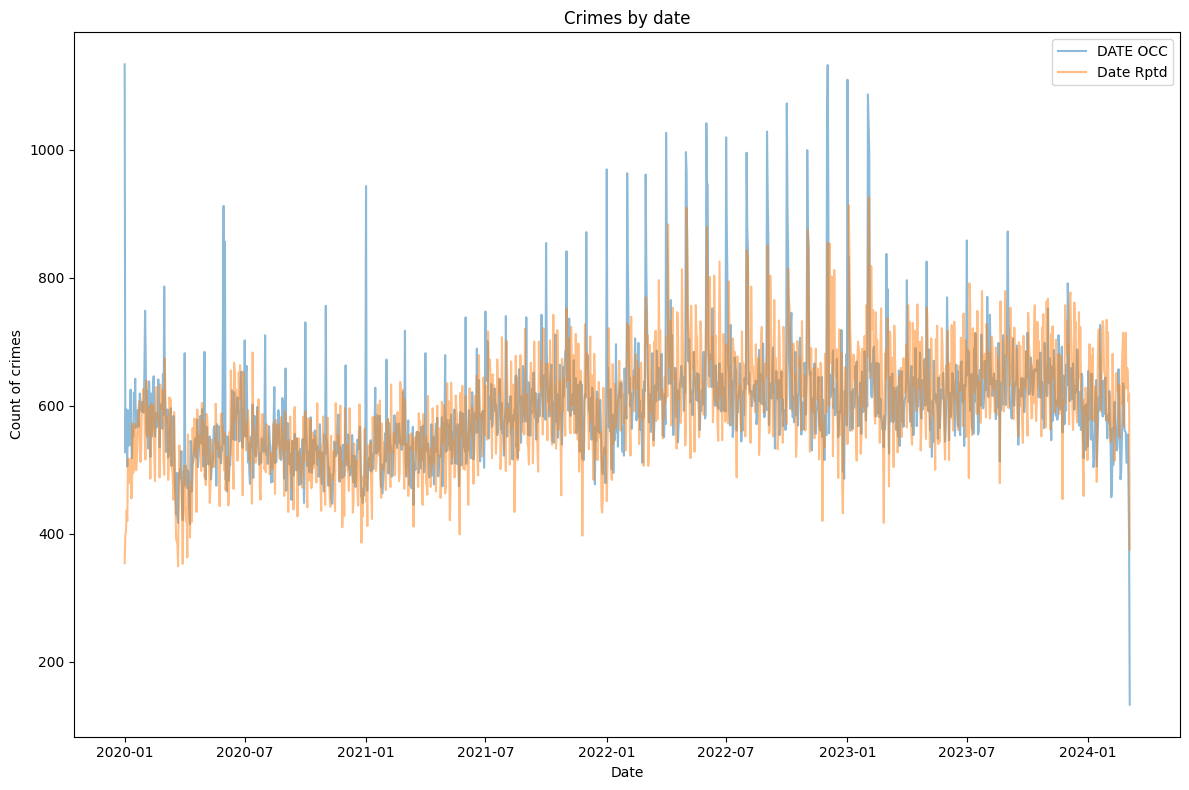

In [64]:
# Merging the two plots
plt.figure(figsize=(12,8))
plt.plot(incidents_date_occ['DATE OCC'], incidents_date_occ['count'], label='DATE OCC', alpha=0.5)
plt.plot(incidents_date_rptd['Date Rptd'], incidents_date_rptd['count'], label='Date Rptd', alpha=0.5)
plt.title('Crimes by date')
plt.xlabel('Date')
plt.ylabel('Count of crimes')
plt.legend()
plt.tight_layout()
plt.show()

#### The resulting plots show that both columns have a generally similar trend. What differentiates them is their range. The date of occurrence shows some high points in the counts, however, it is compensated with the overall height of the line for the date of report in comparison with that of the date of occurrence, which is lower. It demonstrates that crimes are commonly reported within a few days after they took place. 

### Question 4: Which areas have the highest and lowest reported crime rates?

C:\Users\jprin\AppData\Local\Temp\ipykernel_8240\1075739201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='AREA NAME', data=high_crimes_area, palette='viridis')


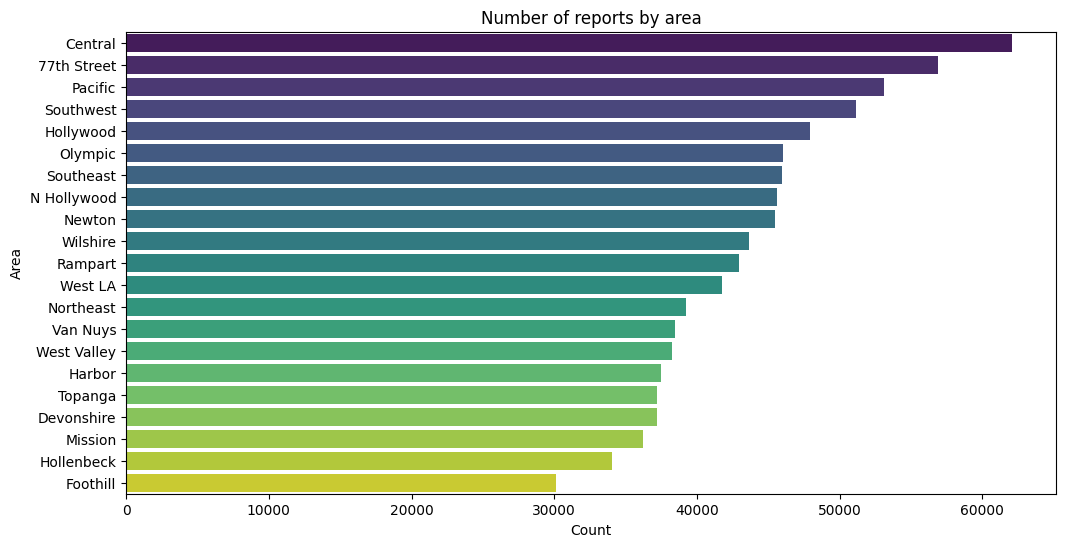

In [65]:
# Counting and sorting crimes by area
high_crimes_area = crimes.groupby('AREA NAME').size().reset_index(name='count').sort_values(by='count', ascending=False)

# Plotting a bar graph of high_crimes_area
plt.figure(figsize=(12,6))
sns.barplot(x='count', y='AREA NAME', data=high_crimes_area, palette='viridis')
plt.title('Number of reports by area')
plt.ylabel('Area')
plt.xlabel('Count')
plt.show()

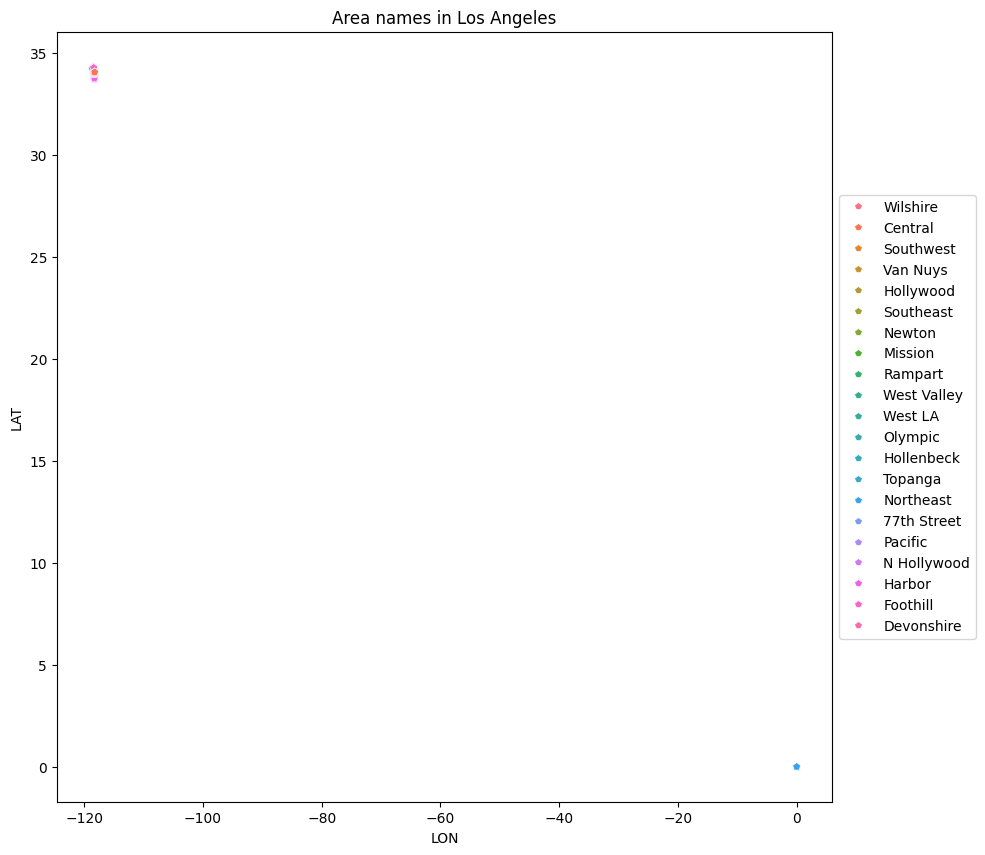

In [66]:
# Plotting areas in Los Angeles
plt.figure(figsize=(10, 10))
sns.scatterplot(x='LON', y='LAT', data=crimes, hue='AREA NAME', marker='p')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Area names in Los Angeles')
plt.show()

In [67]:
correction = crimes['LON'] > -118
crimes = crimes[~correction] 

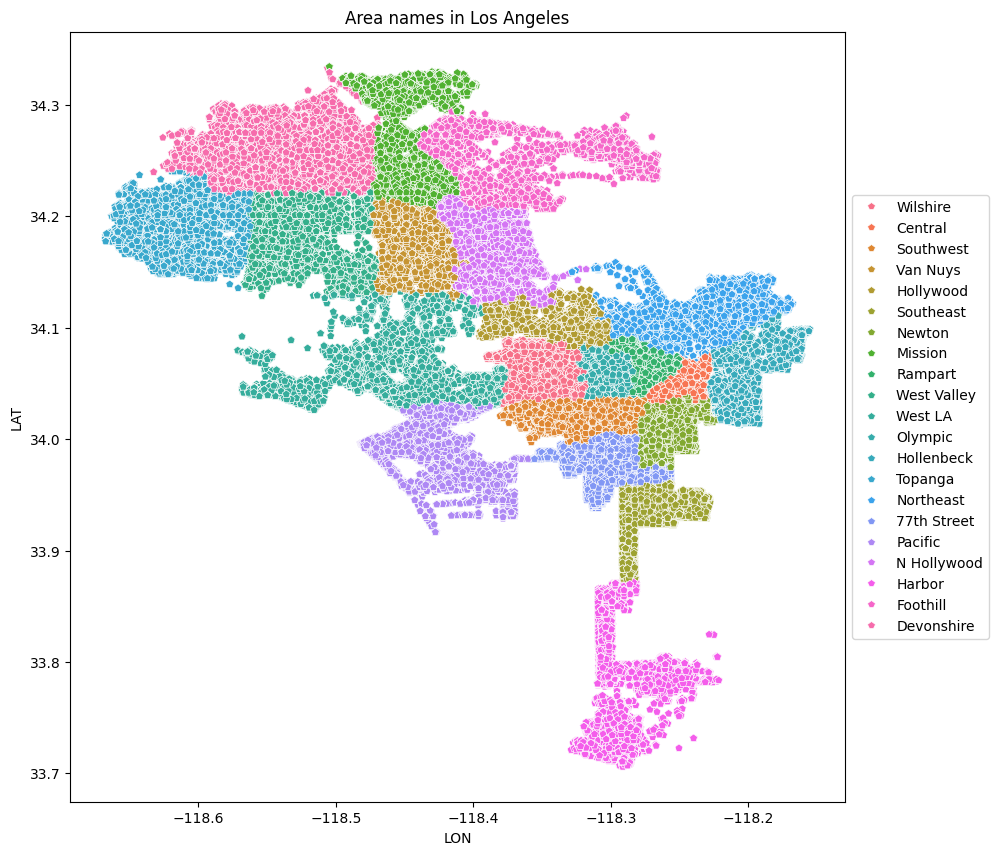

In [68]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='LON', y='LAT', data=crimes, hue='AREA NAME', marker='p')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Area names in Los Angeles')
plt.show()

In [69]:
crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION,LAT,LON,day_differ,hour_occ,crime_category,age_category,month_occ,year_occ,season
0,190326475,2020-03-01,2020-03-01,2130,Wilshire,VEHICLE - STOLEN,0,M,O,STREET,NaN,Adult Arrest,1900 S LONGWOOD AV,34.0375,-118.3506,0,21,Burglary & Theft,0-12,3,2020,Rainy
1,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST,34.0444,-118.2628,1,18,Burglary & Theft,40-49,2,2020,Rainy
2,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST,34.0210,-118.3002,7,17,Burglary & Theft,13-19,11,2020,Rainy
3,200907217,2023-05-10,2020-03-10,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR,34.1576,-118.4387,1156,20,Burglary & Theft,13-19,3,2020,Rainy
4,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT,34.0944,-118.3277,731,12,Burglary & Theft,20-29,8,2020,Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910702,242106032,2024-02-20,2024-02-17,2330,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,DRIVEWAY,NaN,Invest Cont,22700 NAPA ST,34.2260,-118.6214,3,23,Burglary & Theft,40-49,2,2024,Rainy
910703,241604246,2024-01-08,2024-01-08,0800,Foothill,OTHER ASSAULT,42,F,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,VAUGHN ST,34.2865,-118.4161,0,8,Assault & Battery,40-49,1,2024,Rainy
910704,242004546,2024-01-16,2024-01-16,1510,Olympic,BATTERY - SIMPLE ASSAULT,80,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,HOBART BL,34.0690,-118.3054,0,15,Assault & Battery,80-89,1,2024,Rainy
910705,240705409,2024-02-02,2024-01-31,0030,Wilshire,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,Invest Cont,2300 S SYCAMORE AV,34.0360,-118.3527,2,0,Burglary & Theft,0-12,1,2024,Rainy


C:\Users\jprin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


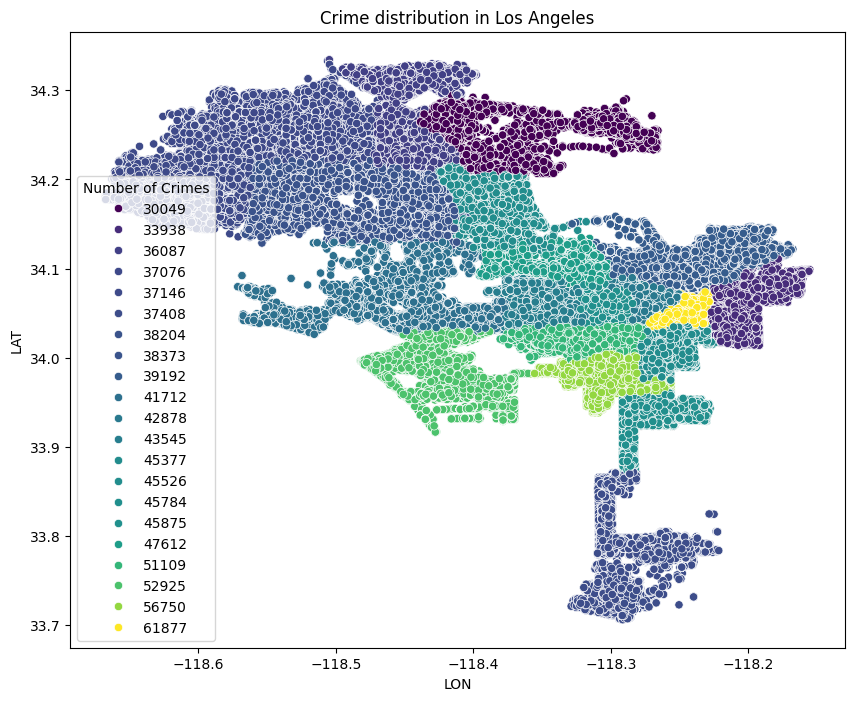

In [70]:
# Counting crimes by area again. This time, they won't be sorted
crimes_area = crimes.groupby('AREA NAME').size().reset_index(name='crime_count')
crimes = pd.merge(crimes, crimes_area, on='AREA NAME')

# Plotting the number of crimes for each area
plt.figure(figsize=(10, 8))
sns.scatterplot(data=crimes, x='LON', y='LAT', hue='crime_count', palette='viridis', legend='full')
plt.title('Crime distribution in Los Angeles')
plt.legend(title='Number of Crimes')
plt.show()

#### The last graph gives a better context of how the number of crimes varies by area. At first, with the bar graph, it showed that Central had the most crimes in the city and so on with the rest of areas. However, by plotting how this number is geographically distributed, it is possible to draw relevant conclusions: Taking into account that Central presents the most cases, it is the yellow are in this last map. Nearby areas such as 77th Street, Pacific and Southwest also have a high count. These 3 are located south-west to the Central area and because of their high number of crimes, they are represented as the areas with brighter colors left to the yellow one. Bordering areas to the north and south don't register that many crimes comparatively.

### Question 5: What is the distribution of sexes and descent across different crime types? Are there any trends or patterns regarding victim demographics in specific types of crimes?

In [71]:
# Displaying unique values for the 'Vict Descent' column
crimes['Vict Descent'].unique()

array(['O', 'X', 'H', 'B', 'W', nan, 'A', 'C', 'K', 'J', 'F', 'I', 'V',
       'S', 'P', 'Z', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [72]:
# Eliminating the values with '-'
no_descent = crimes['Vict Descent'] == '-'
crimes = crimes[~no_descent]

In [73]:
# Counting crimes for each descent
descent_crimes = crimes.groupby('Vict Descent').size().reset_index(name='count')
descent_crimes

,Vict Descent,count
0,A,19964
1,B,127615
2,C,3622
3,D,73
4,F,3904
5,G,64
6,H,276469
7,I,865
8,J,1278
9,K,4956


In [74]:
# Sorting the count in descending order
descent_crimes_sorted = descent_crimes.sort_values(by='count', ascending=False)
descent_crimes_sorted

,Vict Descent,count
6,H,276469
16,W,183679
1,B,127615
17,X,91358
11,O,71680
0,A,19964
9,K,4956
4,F,3904
2,C,3622
8,J,1278


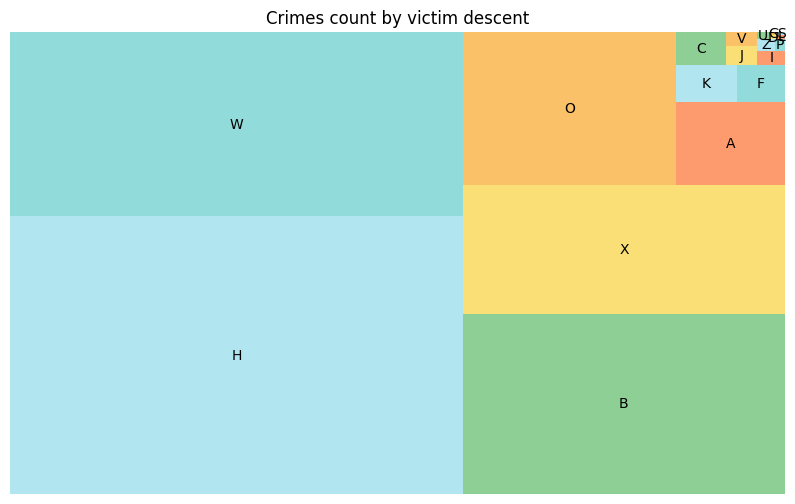

In [75]:
# Creating a treemap of crimes by descent
treemap_colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']
plt.figure(figsize=(10,6))
squarify.plot(sizes=descent_crimes_sorted['count'], label=descent_crimes_sorted['Vict Descent'], alpha=0.7, color=treemap_colors)
plt.axis('off')
plt.title('Crimes count by victim descent')
plt.show()

#### The treemap shows that Hispanics are the most affected victim group, making up a bit more than 25% of the total victims. They are followed by the White descent group. These two represent the half of the total cases. The Black descent group constitutes the third place. It is important to highlight the notable portion that the Unknown ('X') group takes. It may represent cases where the protection of the identity and privacy of the victim were important. 

In [76]:
# Grouping 'Vict Descent' and 'crime_category' in order to calculate the number of cases for each combination of descent and crime category
crimes_descent_count = crimes.groupby(['Vict Descent', 'crime_category']).size().reset_index(name='count') 

In [77]:
# Creating a pivot table for a heat map
pivot_descent = crimes_descent_count.pivot(index='Vict Descent', columns='crime_category', values='count')

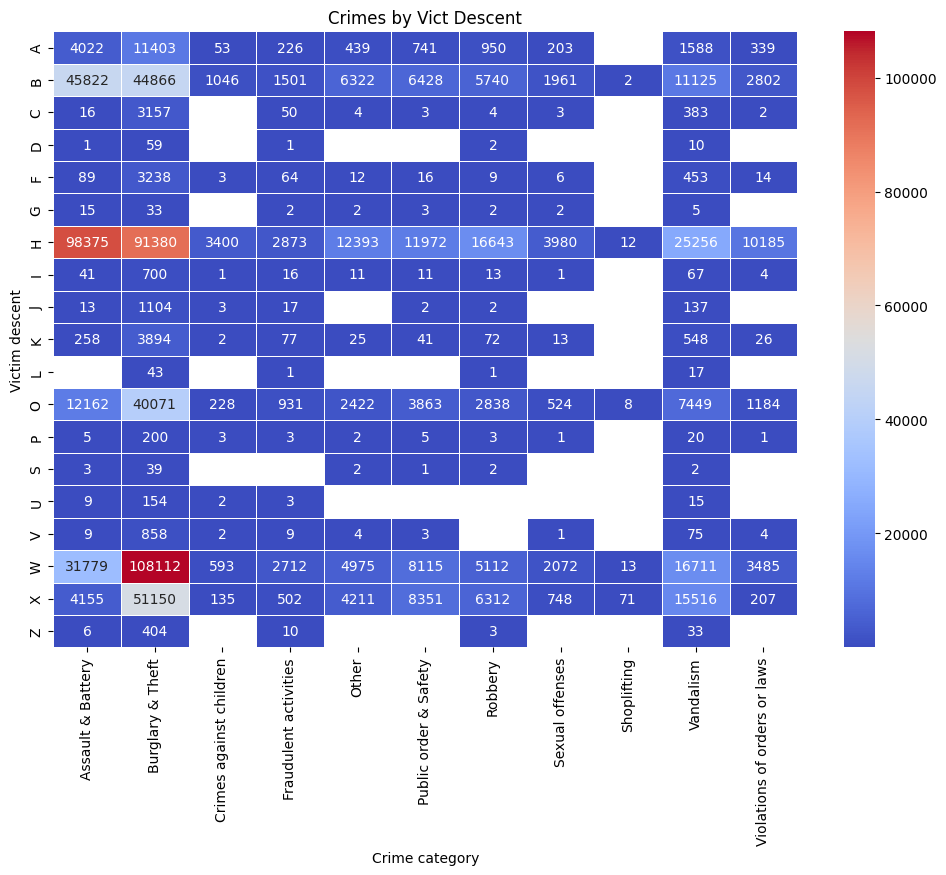

In [78]:
# Plotting a heat map for the variables mentioned above
plt.figure(figsize=(12,8))
sns.heatmap(pivot_descent, cmap='coolwarm', annot=True, fmt='g', linewidths=0.5)
plt.title('Crimes by Vict Descent')
plt.xlabel('Crime category')
plt.ylabel('Victim descent')
plt.show()

#### The heatmap indicates that Hispanic descent victims are especially involved in crimes related to Assault & Battery, as well as Burglary & Theft. On top of that, White descent victims are the group that have reported the most cases for one crime category: Burglary & Theft. That is the crime type that affect them in particular. The Black descent group also report a substantial amount of crimes for the same categories as Hispanics. The big picture describes that the Hispanic group register the most crimes, followed by Whites and then Blacks, while Assault & Battery and Burglary & Theft encompass the most cases.
#### There's a significant portion of victims that didn't specify their descent ('X'), possibly because of privacy and identity confidentiality reasons.

In [79]:
# Designing a pie chart to compare the share of crimes in which each gender was involved (as victims)
crimes_vict_sex = crimes.groupby('Vict Sex').size().reset_index(name='count')

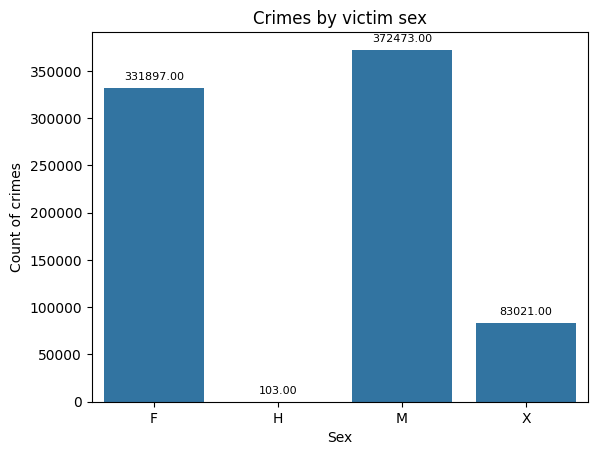

In [80]:
# Create a bar plot of the count of crimes by victim sex
gender_barplot = sns.barplot(data=crimes_vict_sex, x='Vict Sex', y='count')
for bar in gender_barplot.patches:
    gender_barplot.annotate(format(bar.get_height(), '.2f'),
                            (bar.get_x() + bar.get_width() / 2,
                             bar.get_height()), ha='center', va='center',
                             size=8, xytext=(0,8),
                             textcoords='offset points')
plt.title('Crimes by victim sex')
plt.xlabel('Sex')
plt.ylabel('Count of crimes')
plt.show()

In [81]:
# Building a pivot table to create a heat map for 'Vict Sex' and 'crime_category'
crimes_vict_sex_count = crimes.groupby(['Vict Sex', 'crime_category']).size().reset_index(name='count') 
pivot_vict_sex = crimes_vict_sex_count.pivot(index='Vict Sex', columns='crime_category', values='count')

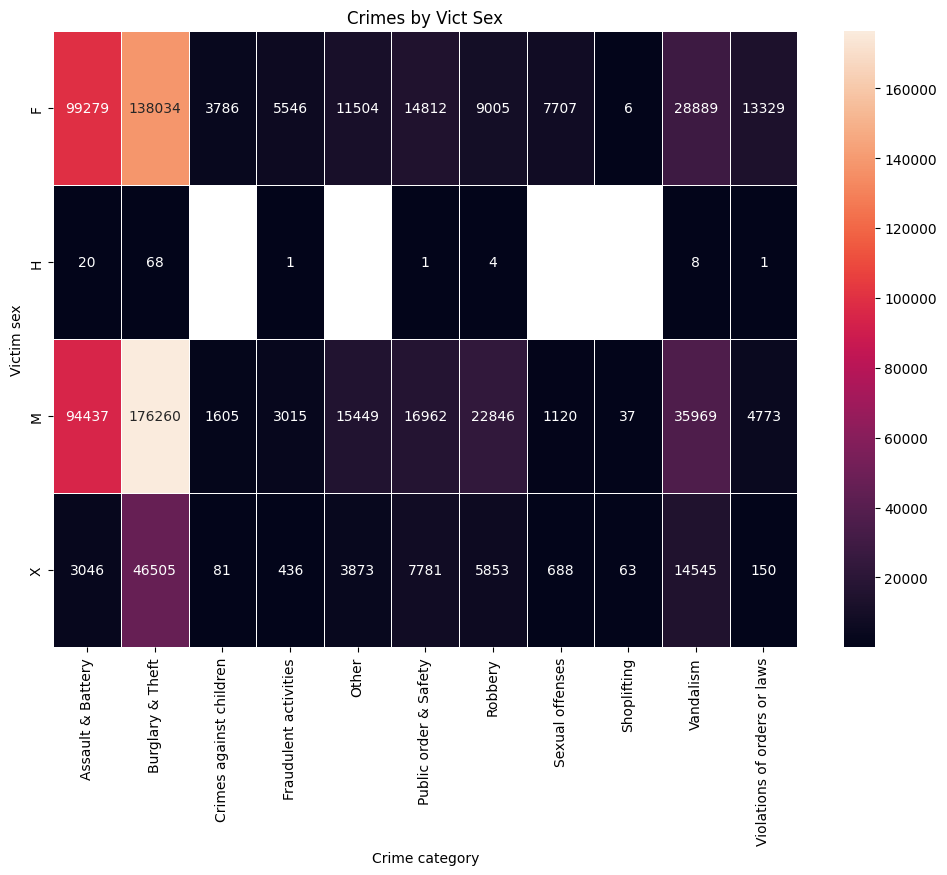

In [82]:
# Generating the heat map
plt.figure(figsize=(12,8))
sns.heatmap(pivot_vict_sex, annot=True, fmt='g', linewidths=0.5)
plt.title('Crimes by Vict Sex')
plt.xlabel('Crime category')
plt.ylabel('Victim sex')
plt.show()

#### This second heatmap reinforces what the first one showed: Assault & Battery and Burglary & Theft constitute the most common types of crimes. Both males and females register high figures for these categories. On the one hand, females are the gender with the most cases for Assault & Battery, closely followed by males. OOn the other hand, males are the principal victims of crimes related with Burglary & Theft. The other two categories, H and X, don't show any relevant occurrences.

### Question 6: What types of premises are most commonly associated with different types of crimes? Is there any correlation between the type of premises and the severity or frequency of reported crimes?

In [83]:
# Displaying the number of unique values for the 'Premis Desc' column
crimes['Premis Desc'].nunique()

306

In [84]:
# Ensuring missing values are filled with an empty string
crimes['Premis Desc'] = crimes['Premis Desc'].fillna('')

In [85]:
# Grouping values into bigger categories
premis_categories = ['Residential', 'Commercial', 'Educational', 'Street & infrastructure', 'Health & services', 'Govt. & public', 'Leisure & touristic']

# Specifying words that characterize each premis category
residential = 'APARTMENT|RESIDENTIAL|DWELLING|RESIDENCE|CONDOMINIUM|HOME|HOUSING|VACATION|HOUSE|ENCAMPMENT|FOSTER'
commercial_retail = 'STORE|MARKET|BUSINESS|ATM|RENTAL|OFFICE|BANK|FINANCE|RESTAURANT|BAR|CREDIT|SHOP|MINI-MART|SUPERMARKET|PARLOR|SUPPLY|APPLIANCE|DEALERSHIP|GOODS|MANUFACTURER|SERVICES'
educational_facilities = 'CARE|SCHOOL|UNIVERSITY'
street_transportation_infrastructure = 'STREET|BUS|METRO|ALLEY|VEHICLE|TRANSPORTATION|PREMISE|STORAGE|GARAGE|PARKING|WASH|STATION|TAXI|DRIVE|TOW|FREEWAY|TRAIN|AIRCRAFT|BOAT|TRUCK|TERMINAL|MTA|SIDEWALK'
health_social_services = 'HOSPITAL|MEDICAL|SHELTERS|HOSPICE|MEDICAL|CLINIC'
government_public_facilities = 'FACILITY|FIRE|CONSTRUCTION|TUNNEL|BRIDGE'
cultural_leisure_touristic = 'HOTEL|MOTEL|MUSEUM|HOSTEL|PARK|CHURCH|GAME|COURTS|MONUMENT|COLISEUM|BEACH|STADIUM|COURSE|GYM|CLUB|RINK|LIBRARY|MOSQUE|WORSHIP|SPORTS|POOL|STUDIO|SYNAGOGUE'

# Applying the word filters
premis_conditions = [
    (crimes['Premis Desc'].str.contains(residential)),
    (crimes['Premis Desc'].str.contains(commercial_retail)),
    (crimes['Premis Desc'].str.contains(educational_facilities)),
    (crimes['Premis Desc'].str.contains(street_transportation_infrastructure)),
    (crimes['Premis Desc'].str.contains(health_social_services)),
    (crimes['Premis Desc'].str.contains(government_public_facilities)),
    (crimes['Premis Desc'].str.contains(cultural_leisure_touristic))
]

# Creating the 'premis_category' column
crimes['premis_category'] = np.select(premis_conditions, premis_categories, default='Other')

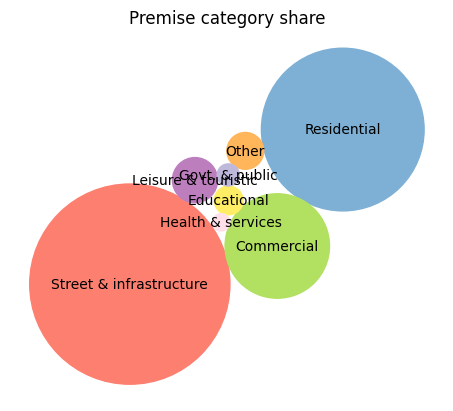

In [86]:
# Creating a bubble chart
premis_counts = crimes['premis_category'].value_counts().reset_index()
premis_counts.columns = ['premis_category', 'count']
premis_counts['colors'] = ['#fd7f6f', '#7eb0d5', '#b2e061', '#bd7ebe', '#ffb55a', '#ffee65', '#beb9db', '#ffe0e9']

# Sort the dataframe by 'count' column in descending order
premis_counts.sort_values(by='count', ascending=False, inplace=True)

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)
        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]
        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )
    
    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])
    
    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                dir_vec = self.com - self.bubbles[i, :2]
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')


bubble_chart = BubbleChart(area=premis_counts['count'],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(
    ax, premis_counts['premis_category'], premis_counts['colors'])
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Premise category share')

plt.show()


#### The resulting chart reveals that Street & infrastructure is the most common premise where crimes take place. Residential registers a great deal of cases, too. Commercial occupies the third place. These premises can easily relate to the most committed crimes, as steals and thefts use to occur in the streets and in public places. The Residential premise may also register these kinds of crimes, but also includes very regular crimes like the theft of identity and vandalism. 

In [87]:
# Finding the 3 largest premises that were categorized as 'Other'
other_premis = crimes[crimes['premis_category'] == 'Other']
other_premis_3largest = other_premis.groupby('Premis Desc').size().nlargest(3)
other_premis_3largest

Premis Desc
OTHER/OUTSIDE    2983
CYBERSPACE       1776
LAUNDROMAT       1528
dtype: int64

In [88]:
# Determining the most common crime by each premise
premis_crimes = crimes.groupby(['premis_category', 'Crm Cd Desc']).size().reset_index(name='count')
idx_premis_count = premis_crimes.groupby('premis_category')['count'].idxmax()
largest_crimes_premis = premis_crimes.loc[idx_premis_count]
largest_crimes_premis

,premis_category,Crm Cd Desc,count
89,Commercial,SHOPLIFTING - PETTY THEFT ($950 & UNDER),21125
134,Educational,BURGLARY,1414
283,Govt. & public,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",681
300,Health & services,BATTERY - SIMPLE ASSAULT,1087
375,Leisure & touristic,BATTERY - SIMPLE ASSAULT,2444
554,Other,THEFT OF IDENTITY,2419
684,Residential,THEFT OF IDENTITY,42579
839,Street & infrastructure,VEHICLE - STOLEN,96943


In [89]:
# Getting the top 5 most common crimes for the most common premise: Street & infrastructure
street_infrastructure = premis_crimes.query("`premis_category` == 'Street & infrastructure'")
street_sorted = street_infrastructure.sort_values(by='count', ascending=False)
street_largest_crimes = street_sorted.head(5)
street_largest_crimes

,premis_category,Crm Cd Desc,count
839,Street & infrastructure,VEHICLE - STOLEN,96943
728,Street & infrastructure,BURGLARY FROM VEHICLE,47893
709,Street & infrastructure,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",34135
819,Street & infrastructure,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),32718
836,Street & infrastructure,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",32512


C:\Users\jprin\AppData\Local\Temp\ipykernel_8240\3689640164.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=street_largest_crimes, x='count', y='Crm Cd Desc', palette='rocket')


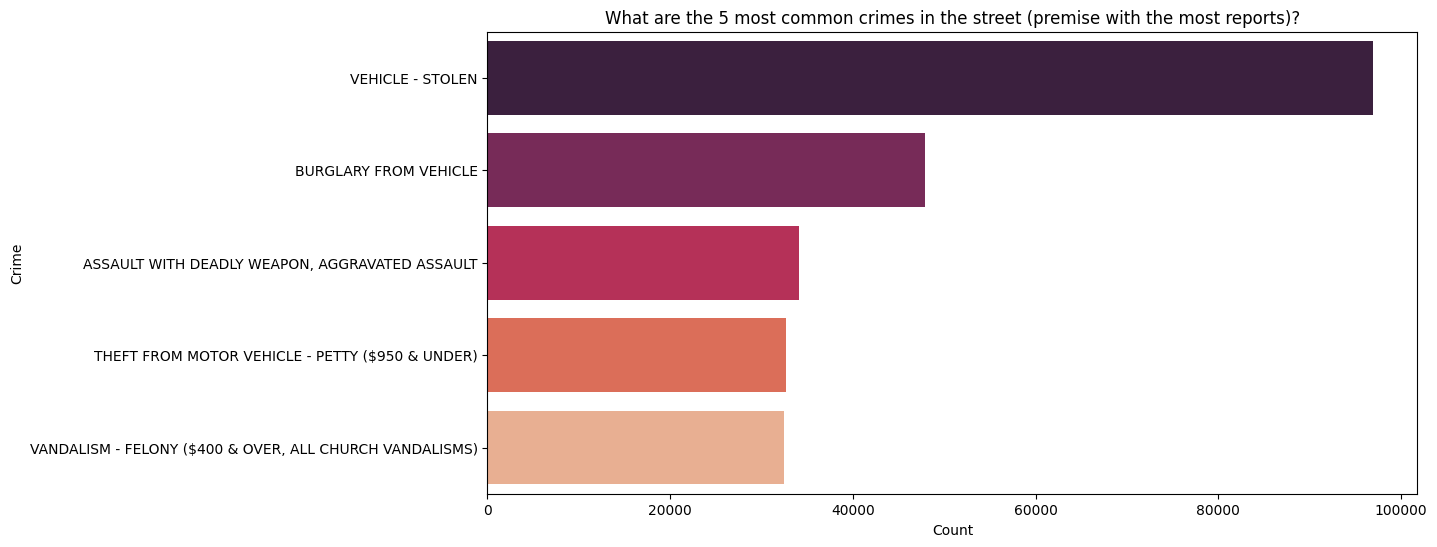

In [90]:
# Plotting the resulting table
plt.figure(figsize=(12,6))
sns.barplot(data=street_largest_crimes, x='count', y='Crm Cd Desc', palette='rocket')
plt.title('What are the 5 most common crimes in the street (premise with the most reports)?')
plt.xlabel('Count')
plt.ylabel('Crime')
plt.show()

### Question 7: How often are weapons used in reported crimes? What types of weapons are most commonly associated with different types of crimes?

In [91]:
# Displaying the unique values of 'Weapon Desc'
crimes['Weapon Desc'].unique()

array([nan, 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'VEHICLE',
       'UNKNOWN WEAPON/OTHER WEAPON', 'VERBAL THREAT',
       'BELT FLAILING INSTRUMENT/CHAIN', 'HAND GUN', 'UNKNOWN FIREARM',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIXED OBJECT',
       'KITCHEN KNIFE', 'MACHETE', 'UNKNOWN TYPE CUTTING INSTRUMENT',
       'MACE/PEPPER SPRAY', 'CLUB/BAT', 'STICK', 'OTHER KNIFE',
       'PHYSICAL PRESENCE', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'HAMMER', 'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
       'SEMI-AUTOMATIC PISTOL', 'SIMULATED GUN', 'RAZOR', 'OTHER FIREARM',
       'FOLDING KNIFE', 'PIPE/METAL PIPE', 'ROCK/THROWN OBJECT', 'RIFLE',
       'OTHER CUTTING INSTRUMENT', 'FIRE', 'REVOLVER', 'BOTTLE',
       'SCISSORS', 'SWITCH BLADE', 'BRASS KNUCKLES', 'BLUNT INSTRUMENT',
       'BOARD', 'STUN GUN', 'CLEAVER', 'RAZOR BLADE', 'SCREWDRIVER',
       'SHOTGUN', 'CONCRETE BLOCK/BRICK', 'CAUSTIC CHEMICAL/POISON',
       'SEMI-AUTOMATIC RIFLE', 'SCALDING LIQUID', 'TIRE I

In [92]:
# Mapping values in 'Weapon Desc' to categories. NaN values represent crimes in which no weapons were used
weapon_desc_mapping = {
    'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)': 'Physical Force',
    'VEHICLE': 'Miscellaneous Weapons',
    'UNKNOWN WEAPON/OTHER WEAPON': 'Miscellaneous Weapons',
    'VERBAL THREAT': 'Physical Force',
    'BELT FLAILING INSTRUMENT/CHAIN': 'Blunt Instruments',
    'HAND GUN': 'Firearms',
    'UNKNOWN FIREARM': 'Firearms',
    'KNIFE WITH BLADE 6INCHES OR LESS': 'Knives and Sharp Instruments',
    'FIXED OBJECT': 'Blunt Instruments',
    'KITCHEN KNIFE': 'Knives and Sharp Instruments',
    'MACHETE': 'Knives and Sharp Instruments',
    'UNKNOWN TYPE CUTTING INSTRUMENT': 'Knives and Sharp Instruments',
    'MACE/PEPPER SPRAY': 'Miscellaneous Weapons',
    'CLUB/BAT': 'Blunt Instruments',
    'STICK': 'Blunt Instruments',
    'OTHER KNIFE': 'Knives and Sharp Instruments',
    'PHYSICAL PRESENCE': 'Physical Force',
    'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH': 'Knives and Sharp Instruments',
    'HAMMER': 'Blunt Instruments',
    'AIR PISTOL/REVOLVER/RIFLE/BB GUN': 'Firearms',
    'SEMI-AUTOMATIC PISTOL': 'Firearms',
    'SIMULATED GUN': 'Firearms',
    'RAZOR': 'Knives and Sharp Instruments',
    'OTHER FIREARM': 'Firearms',
    'FOLDING KNIFE': 'Knives and Sharp Instruments',
    'PIPE/METAL PIPE': 'Blunt Instruments',
    'ROCK/THROWN OBJECT': 'Blunt Instruments',
    'RIFLE': 'Firearms',
    'OTHER CUTTING INSTRUMENT': 'Knives and Sharp Instruments',
    'FIRE': 'Miscellaneous Weapons',
    'REVOLVER': 'Firearms',
    'BOTTLE': 'Knives and Sharp Instruments',
    'SCISSORS': 'Knives and Sharp Instruments',
    'SWITCH BLADE': 'Knives and Sharp Instruments',
    'BRASS KNUCKLES': 'Blunt Instruments',
    'BLUNT INSTRUMENT': 'Blunt Instruments',
    'BOARD': 'Blunt Instruments',
    'STUN GUN': 'Miscellaneous Weapons',
    'CLEAVER': 'Knives and Sharp Instruments',
    'RAZOR BLADE': 'Knives and Sharp Instruments',
    'SCREWDRIVER': 'Knives and Sharp Instruments',
    'SHOTGUN': 'Firearms',
    'CONCRETE BLOCK/BRICK': 'Blunt Instruments',
    'CAUSTIC CHEMICAL/POISON': 'Miscellaneous Weapons',
    'SEMI-AUTOMATIC RIFLE': 'Firearms',
    'SCALDING LIQUID': 'Miscellaneous Weapons',
    'TIRE IRON': 'Blunt Instruments',
    'BOWIE KNIFE': 'Knives and Sharp Instruments',
    'GLASS': 'Knives and Sharp Instruments',
    'AXE': 'Blunt Instruments',
    'TOY GUN': 'Firearms',
    'BOMB THREAT': 'Miscellaneous Weapons',
    'SAWED OFF RIFLE/SHOTGUN': 'Firearms',
    'MARTIAL ARTS WEAPONS': 'Miscellaneous Weapons',
    'DEMAND NOTE': 'Miscellaneous Weapons',
    'DIRK/DAGGER': 'Knives and Sharp Instruments',
    'ASSAULT WEAPON/UZI/AK47/ETC': 'Firearms',
    'ROPE/LIGATURE': 'Miscellaneous Weapons',
    'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearms',
    'EXPLOXIVE DEVICE': 'Miscellaneous Weapons',
    'SWORD': 'Knives and Sharp Instruments',
    'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearms',
    'SYRINGE': 'Miscellaneous Weapons',
    'BOW AND ARROW': 'Miscellaneous Weapons',
    'LIQUOR/DRUGS': 'Miscellaneous Weapons',
    'DOG/ANIMAL (SIC ANIMAL ON)': 'Miscellaneous Weapons',
    'BLACKJACK': 'Blunt Instruments',
    'ICE PICK': 'Knives and Sharp Instruments',
    'RELIC FIREARM': 'Firearms',
    'AUTOMATIC WEAPON/SUB-MACHINE GUN': 'Firearms',
    'ANTIQUE FIREARM': 'Firearms',
    'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearms',
    'STRAIGHT RAZOR': 'Knives and Sharp Instruments',
    'M1-1 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearms',
    'STARTER PISTOL/REVOLVER': 'Firearms',
    'UZI SEMIAUTOMATIC ASSAULT RIFLE': 'Firearms',
    'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON': 'Firearms',
    'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE': 'Firearms',
    'M-14 SEMIAUTOMATIC ASSAULT RIFLE': 'Firearms'
}


In [93]:
# Executing the mapping 
crimes['weapon_category'] = crimes['Weapon Desc'].map(weapon_desc_mapping, na_action='ignore')

In [94]:
# Counting the number of null values in 'weapon_category'
crimes['weapon_category'].isna().sum()

594027

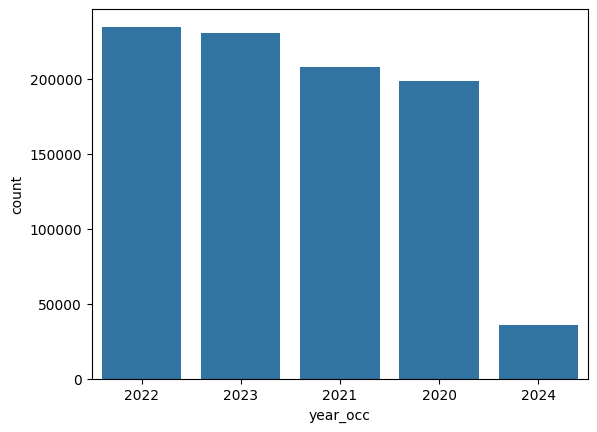

In [95]:
# Creating a bar plot for the annual distribution NaN values 
nan_weapon = crimes[crimes['Weapon Desc'].isna()]
sns.countplot(x='year_occ', data=crimes, order=nan_weapon['year_occ'].value_counts().index)
plt.show()

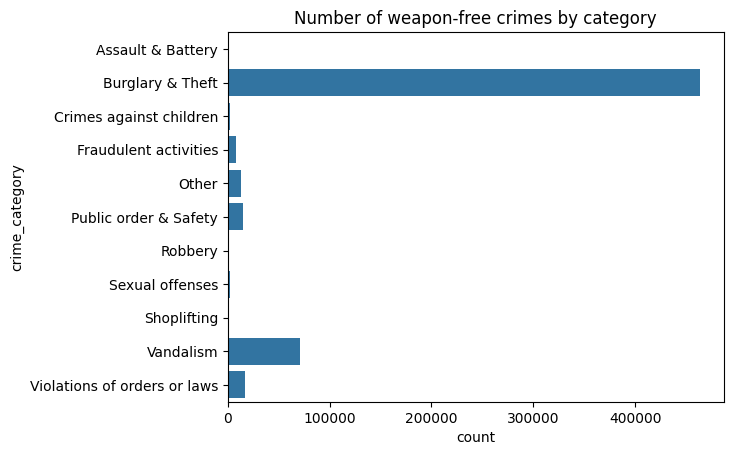

In [96]:
# Plotting the counts of cases for crimes that were executed with no weapons
nan_weapon_crimes = nan_weapon.groupby('crime_category').size().reset_index(name='count')
sns.barplot(data=nan_weapon_crimes, x='count', y='crime_category')
plt.title('Number of weapon-free crimes by category')
plt.show()

In [97]:
nan_weapon_crimes10 = nan_weapon.groupby('Crm Cd Desc').size().nlargest(10).reset_index(name='count')
nan_weapon_crimes10

,Crm Cd Desc,count
0,VEHICLE - STOLEN,97599
1,THEFT OF IDENTITY,56209
2,BURGLARY FROM VEHICLE,53004
3,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",49401
4,BURGLARY,48495
5,THEFT PLAIN - PETTY ($950 & UNDER),44862
6,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),34727
7,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,32182
8,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",29190
9,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23068


#### The number of null values in this column represent an astonishing figure, since it makes up more than the half of the total registers. This may suggest that an enormous amount of cases didn't report the usage of a weapon, and it makes sense, given the fact that there are crimes in which no weapon is needed to execute them, or, the victim didn't see how the crime was made. For instance, there might exist cases in which someone's car was stolen at 'x' moment, and by the time the victim realized, the crime had already occurred. Nevertheless and just in case, the distribution of weapon-free crimes throughout the years will be inspected.  

In [98]:
# Creating the 'weapon_involved' column, which displays True or False depending whether a weapon was used in crime or not 
crimes['weapon_involved'] = ~crimes['Weapon Desc'].isna()

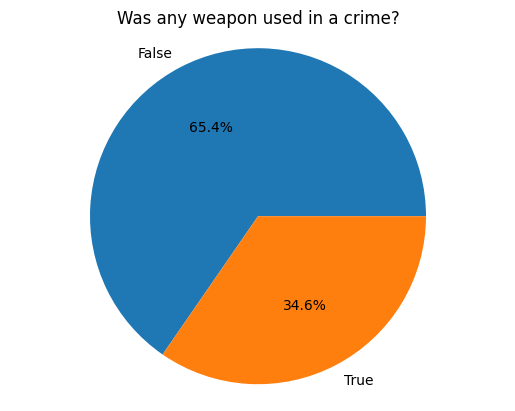

In [99]:
# Generating a pie chat of the share of crimes with and without weapons
weapon_involved_count = crimes.groupby('weapon_involved').size().reset_index(name='count')
plt.pie(weapon_involved_count['count'], labels=weapon_involved_count['weapon_involved'], autopct='%1.1f%%')
plt.title('Was any weapon used in a crime?')
plt.axis('equal')
plt.show()

#### The chart evidences that around two thirds (66%) of the crimes were executed without using a weapon. This behavior is due to the types of crimes that are predominant in Los Angeles. Recalling the first findings, crimes such as car steal, theft of identity and vandalism were positioned as the crimes with the most cases, therefore, it is possible to see that the majority of reports didn't include a weapon. 

In [100]:
# Assigning NaN values to a new category in 'weapon_category': 'No weapon used'
crimes['weapon_category'].fillna('No weapon used', inplace=True)

C:\Users\jprin\AppData\Local\Temp\ipykernel_8240\1069651547.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  crimes['weapon_category'].fillna('No weapon used', inplace=True)


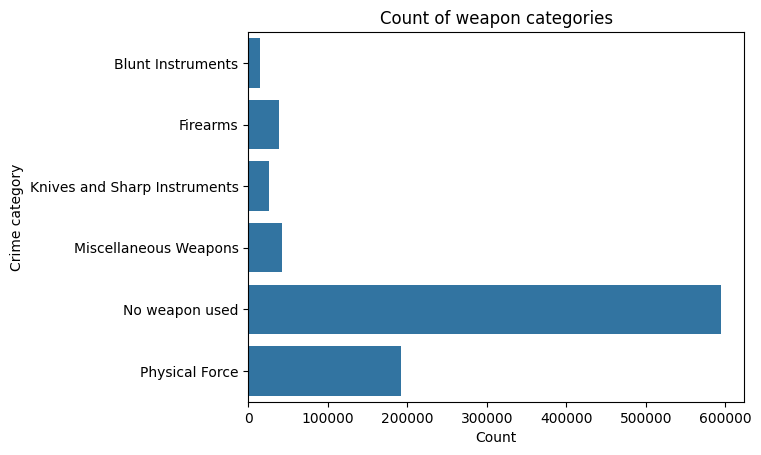

In [101]:
# Counting the number of crimes by their used weapon 
weapon_categories = crimes.groupby('weapon_category').size().reset_index(name='count')
sns.barplot(data=weapon_categories, x='count', y='weapon_category')
plt.title('Count of weapon categories')
plt.xlabel('Count')
plt.ylabel('Crime category')
plt.show()

### Question 8: What is the distribution of case statuses (e.g., Open, Closed) across different types of crimes? Are there any notable differences in case status based on the severity or nature of the crime?

In [102]:
# Displaying unique values for 'Crm Cd Desc', i.e. unique crimes
crimes['Crm Cd Desc'].unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',

In [103]:
# Counting the number of NaN values for the 'Crm Cd Desc' column
crimes['Crm Cd Desc'].isna().sum()

0

In [104]:
# Assigning a level of severity for each crime
crime_desc_mapping = {
    'VEHICLE - STOLEN': 'felony',
    'BURGLARY FROM VEHICLE': 'felony-misdemeanor',
    'BIKE - STOLEN': 'misdemeanor',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'felony',
    'THEFT OF IDENTITY': 'felony',
    'BATTERY - SIMPLE ASSAULT': 'misdemeanor',
    'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH': 'felony',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)': 'felony',
    'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ': 'felony',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'felony',
    'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD': 'misdemeanor',
    'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD': 'felony',
    'RAPE, FORCIBLE': 'felony',
    'CRIMINAL THREATS - NO WEAPON DISPLAYED': 'felony-misdemeanor',
    'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'felony',
    'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'misdemeanor',
    'CHILD ANNOYING (17YRS & UNDER)': 'misdemeanor',
    'BURGLARY': 'felony',
    'CONTEMPT OF COURT': 'misdemeanor',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'misdemeanor',
    'INTIMATE PARTNER - SIMPLE ASSAULT': 'misdemeanor',
    'LEWD CONDUCT': 'misdemeanor',
    'THEFT PLAIN - ATTEMPT': 'misdemeanor',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'felony',
    'OTHER MISCELLANEOUS CRIME': 'infraction',
    'ROBBERY': 'felony',
    'BUNCO, GRAND THEFT': 'felony',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'felony',
    'BATTERY WITH SEXUAL CONTACT': 'felony',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'felony',
    'ORAL COPULATION': 'felony',
    'UNAUTHORIZED COMPUTER ACCESS': 'felony',
    'VIOLATION OF RESTRAINING ORDER': 'misdemeanor',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'misdemeanor',
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'felony',
    'BRANDISH WEAPON': 'felony',
    'DOCUMENT FORGERY / STOLEN FELONY': 'felony',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'misdemeanor',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'misdemeanor',
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT': 'misdemeanor',
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'felony',
    'THREATENING PHONE CALLS/LETTERS': 'misdemeanor',
    'EXTORTION': 'felony',
    'OTHER ASSAULT': 'misdemeanor',
    'PICKPOCKET': 'misdemeanor',
    'ARSON': 'felony',
    'DISTURBING THE PEACE': 'misdemeanor',
    'BUNCO, ATTEMPT': 'misdemeanor',
    'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE': 'felony',
    'PEEPING TOM': 'misdemeanor',
    'VIOLATION OF COURT ORDER': 'misdemeanor',
    'FALSE POLICE REPORT': 'misdemeanor',
    'CONTRIBUTING': 'misdemeanor',
    'FALSE IMPRISONMENT': 'felony',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT': 'felony',
    'ATTEMPTED ROBBERY': 'felony-misdemeanor',
    'CREDIT CARDS, FRAUD USE ($950 & UNDER': 'misdemeanor',
    'CHILD STEALING': 'felony',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'felony',
    'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'misdemeanor',
    'INDECENT EXPOSURE': 'misdemeanor',
    'CHILD NEGLECT (SEE 300 W.I.C.)': 'misdemeanor',
    'STALKING': 'misdemeanor',
    'DISHONEST EMPLOYEE - GRAND THEFT': 'felony',
    'TRESPASSING': 'misdemeanor',
    'BURGLARY, ATTEMPTED': 'misdemeanor',
    'RAPE, ATTEMPTED': 'felony',
    'DISCHARGE FIREARMS/SHOTS FIRED': 'felony',
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'felony',
    'VEHICLE - ATTEMPT STOLEN': 'misdemeanor',
    'PANDERING': 'felony',
    'FIREARMS RESTRAINING ORDER (FIREARMS RO)': 'misdemeanor',
    'RESISTING ARREST': 'misdemeanor',
    'BURGLARY FROM VEHICLE, ATTEMPTED': 'misdemeanor',
    'THEFT, PERSON': 'misdemeanor',
    'BATTERY POLICE (SIMPLE)': 'misdemeanor',
    'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'misdemeanor',
    'THEFT FROM PERSON - ATTEMPT': 'misdemeanor',
    'FAILURE TO YIELD': 'infraction',
    'BOMB SCARE': 'felony',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'felony',
    'PIMPING': 'felony',
    'BUNCO, PETTY THEFT': 'misdemeanor',
    'SHOTS FIRED AT INHABITED DWELLING': 'felony',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER': 'misdemeanor',
    'KIDNAPPING - GRAND ATTEMPT': 'felony-misdemeanor',
    'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT': 'felony',
    'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'felony',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER': 'misdemeanor',
    'THROWING OBJECT AT MOVING VEHICLE': 'felony',
    'DOCUMENT WORTHLESS ($200.01 & OVER)': 'felony',
    'KIDNAPPING': 'felony',
    'CRIMINAL HOMICIDE': 'felony',
    'PURSE SNATCHING': 'misdemeanor',
    'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'misdemeanor',
    'DISHONEST EMPLOYEE - PETTY THEFT': 'misdemeanor',
    'CHILD PORNOGRAPHY': 'felony',
    'WEAPONS POSSESSION/BOMBING': 'felony',
    'DRIVING WITHOUT OWNER CONSENT (DWOC)': 'misdemeanor',
    'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)': 'misdemeanor',
    'LYNCHING': 'felony',
    'RECKLESS DRIVING': 'misdemeanor',
    'SHOPLIFTING - ATTEMPT': 'misdemeanor',
    'COUNTERFEIT': 'misdemeanor',
    'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01': 'felony',
    'CRUELTY TO ANIMALS': 'misdemeanor',
    'BOAT - STOLEN': 'felony',
    'ILLEGAL DUMPING': 'misdemeanor',
    'PROWLER': 'misdemeanor',
    'DRUGS, TO A MINOR': 'felony',
    'THEFT, COIN MACHINE - PETTY ($950 & UNDER)': 'misdemeanor',
    'DOCUMENT WORTHLESS ($200 & UNDER)': 'misdemeanor',
    'BATTERY ON A FIREFIGHTER': 'felony',
    'MANSLAUGHTER, NEGLIGENT': 'felony',
    'PETTY THEFT - AUTO REPAIR': 'misdemeanor',
    'THEFT, COIN MACHINE - ATTEMPT': 'misdemeanor',
    'TILL TAP - PETTY ($950 & UNDER)': 'misdemeanor',
    'PURSE SNATCHING - ATTEMPT': 'misdemeanor',
    'LYNCHING - ATTEMPTED': 'felony-misdemeanor',
    'BIKE - ATTEMPTED STOLEN': 'misdemeanor',
    'GRAND THEFT / AUTO REPAIR': 'felony',
    'CONSPIRACY': 'felony',
    'BRIBERY': 'felony',
    'GRAND THEFT / INSURANCE FRAUD': 'felony',
    'DRUNK ROLL': 'misdemeanor',
    'CHILD ABANDONMENT': 'misdemeanor',
    'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)': 'felony',
    'DISRUPT SCHOOL': 'misdemeanor',
    'PICKPOCKET, ATTEMPT': 'misdemeanor',
    'TELEPHONE PROPERTY - DAMAGE': 'misdemeanor',
    'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM': 'felony',
    'BIGAMY': 'felony',
    'FAILURE TO DISPERSE': 'misdemeanor',
    'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)': 'misdemeanor',
    'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)': 'felony',
    'BLOCKING DOOR INDUCTION CENTER': 'misdemeanor',
    'INCITING A RIOT': 'felony',
    'DISHONEST EMPLOYEE ATTEMPTED THEFT': 'misdemeanor',
    'TRAIN WRECKING': 'felony'
}

In [105]:
# Creating the 'crime_severity' column by mapping the dictionary above to the 'Crm Cd Desc' column
crimes['crime_severity'] = crimes['Crm Cd Desc'].map(crime_desc_mapping)

In [106]:
# Capitalizing the first character of every value in the 'crime_severity' column 
crimes['crime_severity'] = crimes['crime_severity'].str.capitalize()

In [107]:
# Grouping Status Desc and crime_severity to count them and then creating a pivot table to plot the result
severity_status_count = crimes.groupby(['Status Desc', 'crime_severity']).size().reset_index(name='count') 
pivot_severity_status = severity_status_count.pivot(index='crime_severity', columns='Status Desc', values='count')

In [108]:
pivot_severity_status

Status Desc,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other,UNK
crime_severity,,,,,,
Felony,44255.0,33682.0,404310.0,1951.0,536.0,1.0
Felony-misdemeanor,5264.0,6061.0,68078.0,184.0,84.0,1.0
Infraction,1285.0,859.0,5735.0,64.0,33.0,NaN
Misdemeanor,28248.0,57896.0,248167.0,765.0,979.0,3.0


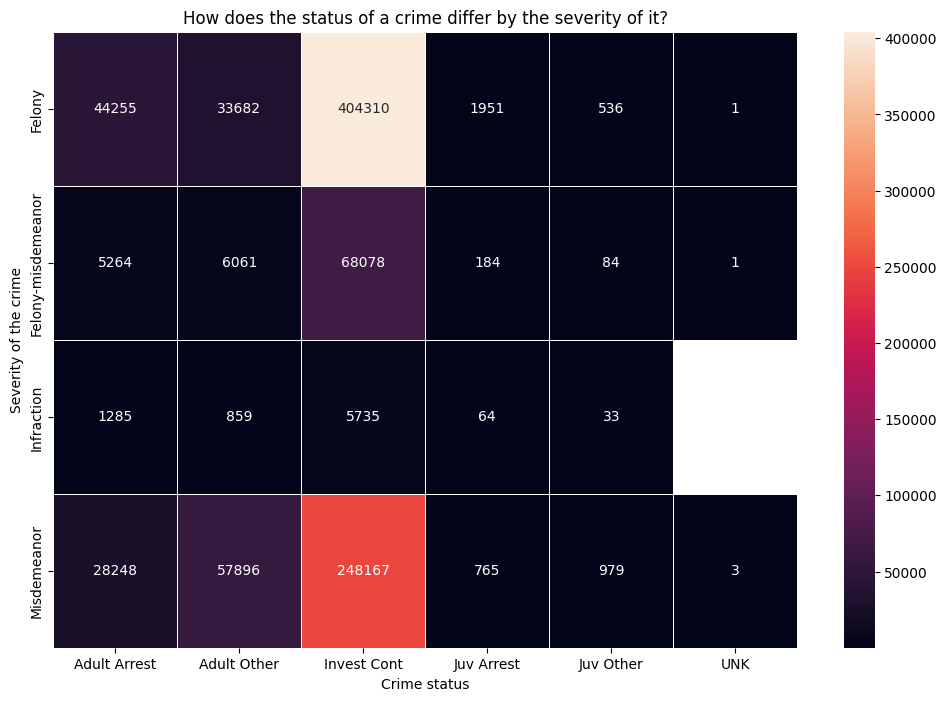

In [109]:
# Plotting a heatmap of the counts for the intersection between each crime status and its severity
plt.figure(figsize=(12,8))
sns.heatmap(pivot_severity_status, annot=True, fmt='g', linewidths=0.5)
plt.title('How does the status of a crime differ by the severity of it?')
plt.ylabel('Severity of the crime')
plt.xlabel('Crime status')
plt.show()

#### From the heatmap it is possible to conclude that the majority of cases are under Invest Cont (Investigation Continued), therefore, the law enforcement is still gathering evidence, interviewing witnesses or pursuing leads related to the crime. That means that more than 700.000 cases are being investigated. This also possibly means that the crimes under investigation are particularly complex or serious. Taking into account that felonies report the biggest number in combination with this status, it makes sense to think that plenty of cases are major felonies and organized crime activities. 
#### A big number of misdemeanors under the same status could mean that the law enforcement is proactive in the investigation of all types of delinquency, regardless of the severity. This could aim to prevent minor offenses from escalating into more serious crimes.
#### Although arrests are the second most common status for felonies, a comparatively considerable number of cases for this severity don't result in formal arrests. 
#### The second highest number for misdemeanors, Adult Other, indicates that cases in this level of severity tend to end up with other ways of resolution, like warnings, investigations, citations, et cetera.

In [110]:
# Displaying unique values for the 'Vict Sex' column
crimes['Vict Sex'].unique()

array(['M', 'X', 'F', nan, 'H'], dtype=object)

In [111]:
# Replacing 'H' values for 'X'
crimes['Vict Sex'] = crimes['Vict Sex'].str.replace('H', 'X')

In [112]:
# Counting crimes by severity level
severity_counts = crimes['crime_severity'].value_counts().sort_values(ascending=False).index

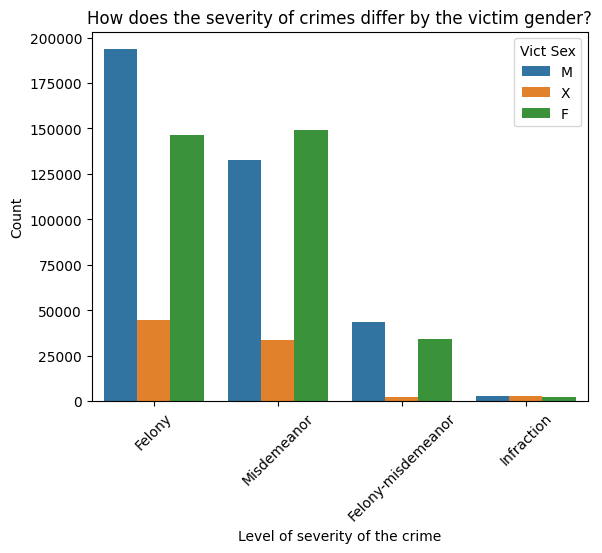

In [113]:
# Generating a bar plot to display the count of crimes split by severity and gender 
sns.countplot(data=crimes, x='crime_severity', hue='Vict Sex', order=severity_counts)
plt.xlabel('Level of severity of the crime')
plt.ylabel('Count')
plt.title('How does the severity of crimes differ by the victim gender?')
plt.xticks(rotation=45)
plt.show()

In [114]:
# Grouping descent groups and crime severity to count their combinations
descent_severity = crimes.groupby(['Vict Descent', 'crime_severity']).size().reset_index(name='count')
descent_severity_pivot = descent_severity.pivot(index='Vict Descent', columns='crime_severity', values='count')

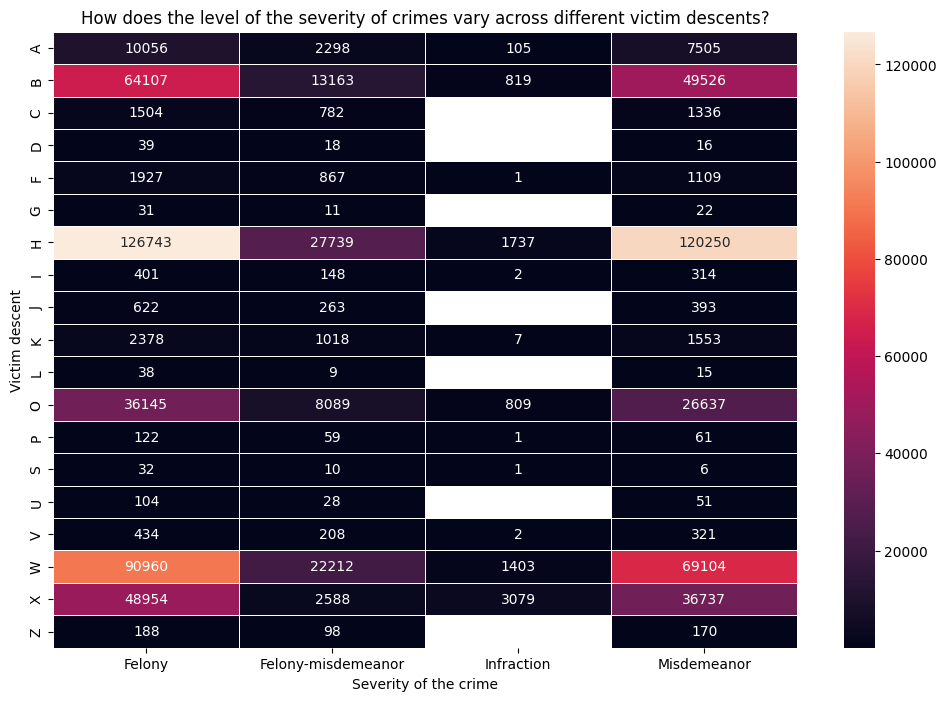

In [115]:
# Plotting a heatmap that shows the crime count for each combination between descent and level of severity
plt.figure(figsize=(12,8))
sns.heatmap(data=descent_severity_pivot, annot=True, fmt='g', linewidths=0.5)
plt.title('How does the level of the severity of crimes vary across different victim descents?')
plt.ylabel('Victim descent')
plt.xlabel('Severity of the crime')
plt.show()

#### From the heatmap it is possible to establish that it is indeed correlated with the graphs showing how crime occurrence is shaped by descent. The plot above reassures that Hispanic victims experience the most crimes, as their numbers even exceed the 100.000 cases. Such figure isn't reached by any other descent. This group is notably affected by both serious and minuscule crimes, as felonies and misdemeanors are highlighted. These two levels seem to register the most cases across the majority of descent groups. Again, the White descent group appears as the second most affected segment and in third place remains the Black descent community. Both 'X' and 'O' have significant figures for the two categories.   
#### The unknown ('X') and Other ('O') descent group show a significant number of cases here as well in the same two severity levels.

### Question 9: How do crime categories vary spatially? Is there any pattern?

In [116]:
# Counting crimes by area
crime_desc_area = crimes.groupby(['AREA NAME', 'Crm Cd Desc']).size().reset_index(name='crime_desc_count')

# Extracting the most committed crime for each area
idx_crimes_area = crime_desc_area.groupby('AREA NAME')['crime_desc_count'].idxmax()

# Applying the result to the first table
most_common_crime_area = crime_desc_area.loc[idx_crimes_area]

In [117]:
# Integrating the results in order to create a scatterplot
crimes = pd.merge(crimes, most_common_crime_area, on='AREA NAME')

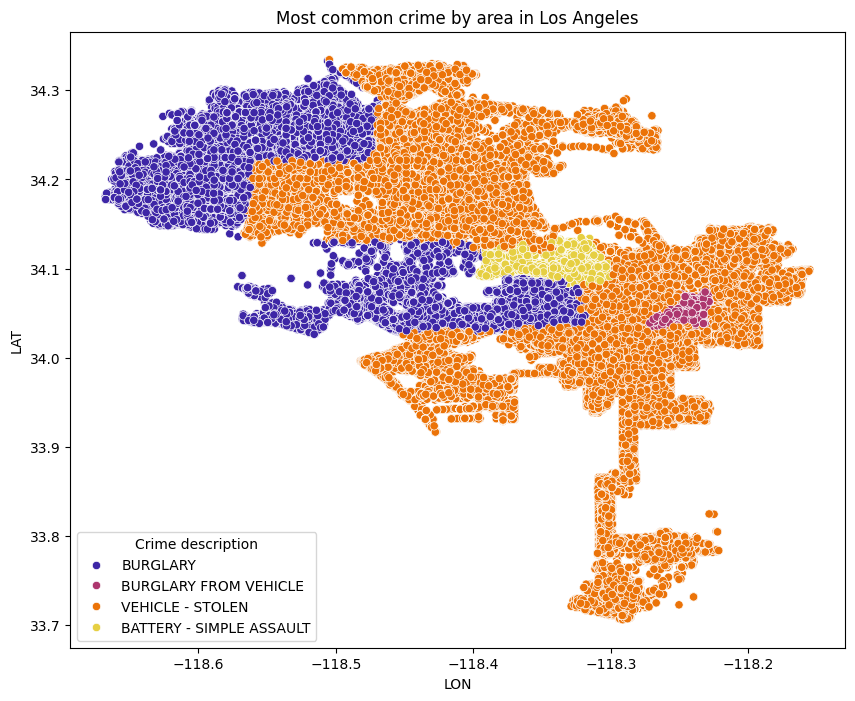

In [118]:
# Generating a map-like scatterplot showing the most common crime by area
plt.figure(figsize=(10,8))
sns.scatterplot(data=crimes, x='LON', y='LAT', hue='Crm Cd Desc_y', palette='CMRmap', legend='full')
plt.title('Most common crime by area in Los Angeles')
plt.legend(title='Crime description')
plt.show()

#### The graph above clearly points the steal of vehicles as a crime that frequently occurs the most across the majority of areas in the city. Curiously, the area with the most reports, Central, registers the burglary from vehicles as the most common crime. Equally, northwestern areas experience burglaries as the crime with the highest frequency.
#### After some research, it was found that coastal areas (northwest) tend to represent high income zones in the city, whereas zones in the central and eastern parts of Los Angeles host low-income households. This may correlate with the possibility of occurrence of a crime, since burglaries could take place in high-income households and exclusive stores because of the economic value of objects to be stolen. 

### Conclusions

#### In this project, I have thoroughly investigated crime statistics in Los Angeles, aiming to comprehend the various categories of offenses, characteristics of victims, spatial distributions, and temporal trends. The following accomplishments were made:

#### - Prior to the analysis, the dataset was preprocessed by handling missing values and manipulating data to adjust the dataset to the needs in terms of format. 
#### - After the data cleaning and wrangling, the exploratory analysis was carried out in order to acquire meaningful insights and answer to relevant guiding questions.

#### 1. The top 10 crimes were identified and plotted through a bar graph. In addition, the crimes were classified into bigger categories and then visually represented.

#### 2. Vict Age was analyzed, first by plotting it with the help of Sturges' formula and then by creating and plotting the ‘age_category’ column. During the process, negative values were handled as well.

#### 3. Crimes were analyzed from various time scopes: years, months, seasons, days, and hours. Consequently, ‘year_occ’, ‘month_occ’, ‘season’, ‘day_occ’ and ‘hour_occ’ were extracted from ‘DATE OCC’ and created as columns, each one storing the respective time unit in which a crime occurred. The average crimes by some time units were also calculated. The counts for each of the columns were represented by line and bar plots. In addition, ‘day_differ’ was added to the dataset as the result of subtracting ‘Date Rptd’ and ‘DATE OCC’ with the aim of getting the difference in days of the time when a crime occurred and when it was reported. The average and median were calculated, and it was equally plotted in a bar plot. Finally, crimes by date of occurrence and reporting were represented in a unique line plot.

#### 4. Counts by area were also made, not only showing the result through a bar plot, but also through a map-like scatterplot. 

#### 5. A treemap was designed to visualize the counts for Vict Descent, while this column was also analyzed alongside with crime categories by means of a heatmap. The same was done with the count of crimes by Vict Sex. 

#### 6. Premise categories were generated to group the 306 different premises into a representative classification. Empty values for the column were handled and classified. To show the count of crimes for these categories, a bubble chart was designed. Furthermore, the most common crime for each premise category was determined and the 5 crimes with the highest frequency for the most popular premise were plotted.

#### 7. Like the previous point, weapon categories were created, since ‘Weapon Desc’ contained an elevated number of unique values. The count of each weapon was portrayed and from there, a pie chart was created in order to see the number of crimes in which no weapon was used. Plus, the count of weapon-free cases by crime category was in turn represented.

#### 8. Crimes were arranged into 4 levels of severity through a column and then, their occurrences were counted by crime status employing a heatmap. The severity was also plotted by gender using a bar plot. At last, this classification was combined with the victim descent to generate a heatmap.

#### 9. The most common crime for each area was found and visualized as another map-like scatterplot.
